# 1. Setup

## 1.1 Import Libraries and Packages

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import os
warnings.filterwarnings("ignore")

## 1.2 Relevant Functions

In [2]:
pwd

'C:\\Users\\Lenovo\\Desktop\\Data Science Working\\KPMG INTERNSHIP PROGRAM\\Attempt2\\Phase Two'

# 2. Import Files for Analysis

In [3]:
file_names = ['data/df_address_cleaned.csv', 'data/df_demographic_cleaned.csv', 'data/df_transactions_cleaned.csv']
dataframes = []

for file_name in file_names:
    df = pd.read_csv(file_name)
    dataframes.append(df)

df_add, df_demo, df_tran = dataframes

In [4]:
df_demo_original = df_demo.copy()

In [5]:
df_add_original = df_add.copy()

In [6]:
df_tran_original = df_tran.copy()

In [7]:
# df_add = df_add_original.copy()

# 3. Data Wrangling

## 3.1 Demographic Table

In [8]:
df_demo.head(10)

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp  Female   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot     Talbot    Male   
4            5  Sheila-kathryn     Calton  Female   
5            6            Curr  Duckhouse    Male   
6            7            Fina     Merali  Female   
7            8             Rod      Inder    Male   
8            9            Mala       Lind  Female   
9           10        Fiorenze    Birdall  Female   

   past_3_years_bike_related_purchases                             job_title  \
0                                   93                   Executive Secretary   
1                                   81                Administrative Officer   
2                                   61                    Recruiting Manager   
3                                   33                    Recruiting Manager   
4                                   56                         Senior Editor   
5                                   35                         Senior Editor   
6                                    6                         Senior Editor   
7                                   31                       Media Manager I   
8                                   97  Business Systems Development Analyst   
9                                   49               Senior Quality Engineer   

  job_industry_category     wealth_segment owns_car  tenure age_class  
0                Health      Mass Customer      Yes      11     70-79  
1    Financial Services      Mass Customer      Yes      16     40-49  
2              Property      Mass Customer      Yes      15     70-79  
3                    IT      Mass Customer       No       7     60-69  
4                    IT  Affluent Customer      Yes       8     40-49  
5                Retail     High Net Worth      Yes      13     50-59  
6    Financial Services  Affluent Customer      Yes      11     40-49  
7    Financial Services      Mass Customer       No       7     60-69  
8           Argiculture  Affluent Customer      Yes       8     50-59  
9    Financial Services      Mass Customer      Yes      20     30-39

In [9]:
column_drop = ['first_name', 'last_name']
df_demo.drop(columns=column_drop, inplace=True)

In [10]:
df_demo.head(10)

customer_id  gender  past_3_years_bike_related_purchases  \
0            1  Female                                   93   
1            2    Male                                   81   
2            3    Male                                   61   
3            4    Male                                   33   
4            5  Female                                   56   
5            6    Male                                   35   
6            7  Female                                    6   
7            8    Male                                   31   
8            9  Female                                   97   
9           10  Female                                   49   

                              job_title job_industry_category  \
0                   Executive Secretary                Health   
1                Administrative Officer    Financial Services   
2                    Recruiting Manager              Property   
3                    Recruiting Manager                    IT   
4                         Senior Editor                    IT   
5                         Senior Editor                Retail   
6                         Senior Editor    Financial Services   
7                       Media Manager I    Financial Services   
8  Business Systems Development Analyst           Argiculture   
9               Senior Quality Engineer    Financial Services   

      wealth_segment owns_car  tenure age_class  
0      Mass Customer      Yes      11     70-79  
1      Mass Customer      Yes      16     40-49  
2      Mass Customer      Yes      15     70-79  
3      Mass Customer       No       7     60-69  
4  Affluent Customer      Yes       8     40-49  
5     High Net Worth      Yes      13     50-59  
6  Affluent Customer      Yes      11     40-49  
7      Mass Customer       No       7     60-69  
8  Affluent Customer      Yes       8     50-59  
9      Mass Customer      Yes      20     30-39

## 3.2 Address Table

In [11]:
df_add.head(10)

customer_id                  address  postcode state    country  \
0            1       060 Morning Avenue      2016   NSW  Australia   
1            2      6 Meadow Vale Court      2153   NSW  Australia   
2            4       0 Holy Cross Court      4211   QLD  Australia   
3            5      17979 Del Mar Point      2448   NSW  Australia   
4            6         9 Oakridge Court      3216   VIC  Australia   
5            7         4 Delaware Trail      2210   NSW  Australia   
6            8      49 Londonderry Lane      2650   NSW  Australia   
7            9          97736 7th Trail      2023   NSW  Australia   
8           11     93405 Ludington Park      3044   VIC  Australia   
9           12  44339 Golden Leaf Alley      4557   QLD  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9  
5                   9  
6                   4  
7                  12  
8                   8  
9                   4

In [12]:
column_drop = ['address', 'postcode', 'country']
df_add.drop(columns=column_drop, inplace=True)

In [13]:
df_add.head(10)

customer_id state  property_valuation
0            1   NSW                  10
1            2   NSW                  10
2            4   QLD                   9
3            5   NSW                   4
4            6   VIC                   9
5            7   NSW                   9
6            8   NSW                   4
7            9   NSW                  12
8           11   VIC                   8
9           12   QLD                   4

## 3.3 Transaction Table

In [14]:
df_tran.head(10)

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25             0   
1               2           3         3120       2017-05-21             1   
2               3          37          402       2017-10-16             0   
3               4          88         3135       2017-08-31             0   
4               5          78          787       2017-10-01             1   
5               6          25         2339       2017-03-08             1   
6               7          22         1542       2017-04-21             1   
7               8          15         2459       2017-07-15             0   
8               9          67         1305       2017-08-10             0   
9              10          12         3262       2017-08-30             1   

            brand product_line product_class product_size  list_price  \
0           Solex     Standard        medium       medium       71.49   
1   Trek Bicycles     Standard        medium        large     2091.47   
2      OHM Cycles     Standard           low       medium     1793.43   
3  Norco Bicycles     Standard        medium       medium     1198.46   
4  Giant Bicycles     Standard        medium        large     1765.30   
5  Giant Bicycles         Road        medium       medium     1538.99   
6        WeareA2B     Standard        medium       medium       60.34   
7        WeareA2B     Standard        medium       medium     1292.84   
8           Solex     Standard        medium        large     1071.23   
9        WeareA2B     Standard        medium       medium     1231.15   

   standard_cost product_first_sold_date  
0          53.62              2012-12-04  
1         388.92              2014-03-05  
2         248.82              1999-07-22  
3         381.10              1998-12-18  
4         709.48              2015-08-12  
5         829.65              2006-11-12  
6          45.26              1993-07-17  
7          13.44              2009-04-14  
8         380.74              1991-08-07  
9         161.60              2004-08-19

## 3.4 Combine Datasets

### 3.4.1 Merge 'Transaction' with 'Demographic' Tables

In [15]:
df1 = pd.merge(df_tran,df_demo, on='customer_id')

In [16]:
df1.head(10)

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25             0   
1           11065           1         2950       2017-10-16             0   
2           18923          62         2950       2017-04-26             0   
3               2           3         3120       2017-05-21             1   
4            6862           4         3120       2017-10-05             0   
5            9155          91         3120       2017-10-30             1   
6           11409          95         3120       2017-01-30             0   
7           13066          38         3120       2017-01-20             1   
8           15829          41         3120       2017-12-10             0   
9           18612          10         3120       2017-10-24             0   

            brand product_line product_class product_size  list_price  \
0           Solex     Standard        medium       medium       71.49   
1  Giant Bicycles     Standard        medium       medium     1403.50   
2           Solex     Standard        medium       medium      478.16   
3   Trek Bicycles     Standard        medium        large     2091.47   
4  Giant Bicycles     Standard          high       medium     1129.13   
5           Solex     Standard        medium       medium      100.35   
6  Giant Bicycles     Standard        medium        large      569.56   
7           Solex     Standard        medium       medium     1577.53   
8           Solex         Road        medium       medium      416.98   
9        WeareA2B      Touring        medium       medium     1466.68   

   standard_cost product_first_sold_date  gender  \
0          53.62              2012-12-04    Male   
1         954.82              2003-02-09    Male   
2         298.72              2010-11-07    Male   
3         388.92              2014-03-05  Female   
4         677.48              2011-04-18  Female   
5          75.26              2004-01-18  Female   
6         528.43              1994-08-12  Female   
7         826.51              1993-04-14  Female   
8         312.74              2014-07-30  Female   
9         363.25              2004-08-19  Female   

   past_3_years_bike_related_purchases            job_title  \
0                                   19  Software Engineer I   
1                                   19  Software Engineer I   
2                                   19  Software Engineer I   
3                                   89  Clinical Specialist   
4                                   89  Clinical Specialist   
5                                   89  Clinical Specialist   
6                                   89  Clinical Specialist   
7                                   89  Clinical Specialist   
8                                   89  Clinical Specialist   
9                                   89  Clinical Specialist   

  job_industry_category wealth_segment owns_car  tenure age_class  
0    Financial Services  Mass Customer      Yes      10     60-69  
1    Financial Services  Mass Customer      Yes      10     60-69  
2    Financial Services  Mass Customer      Yes      10     60-69  
3                Health  Mass Customer      Yes      10     40-49  
4                Health  Mass Customer      Yes      10     40-49  
5                Health  Mass Customer      Yes      10     40-49  
6                Health  Mass Customer      Yes      10     40-49  
7                Health  Mass Customer      Yes      10     40-49  
8                Health  Mass Customer      Yes      10     40-49  
9                Health  Mass Customer      Yes      10     40-49

### 3.4.2 Merge 'df1' with 'Address' Tables

In [17]:
df_all = pd.merge(df1,df_add, on='customer_id')

In [18]:
df_all.head(10)

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25             0   
1           11065           1         2950       2017-10-16             0   
2           18923          62         2950       2017-04-26             0   
3               2           3         3120       2017-05-21             1   
4            6862           4         3120       2017-10-05             0   
5            9155          91         3120       2017-10-30             1   
6           11409          95         3120       2017-01-30             0   
7           13066          38         3120       2017-01-20             1   
8           15829          41         3120       2017-12-10             0   
9           18612          10         3120       2017-10-24             0   

            brand product_line product_class product_size  list_price  ...  \
0           Solex     Standard        medium       medium       71.49  ...   
1  Giant Bicycles     Standard        medium       medium     1403.50  ...   
2           Solex     Standard        medium       medium      478.16  ...   
3   Trek Bicycles     Standard        medium        large     2091.47  ...   
4  Giant Bicycles     Standard          high       medium     1129.13  ...   
5           Solex     Standard        medium       medium      100.35  ...   
6  Giant Bicycles     Standard        medium        large      569.56  ...   
7           Solex     Standard        medium       medium     1577.53  ...   
8           Solex         Road        medium       medium      416.98  ...   
9        WeareA2B      Touring        medium       medium     1466.68  ...   

   gender past_3_years_bike_related_purchases            job_title  \
0    Male                                  19  Software Engineer I   
1    Male                                  19  Software Engineer I   
2    Male                                  19  Software Engineer I   
3  Female                                  89  Clinical Specialist   
4  Female                                  89  Clinical Specialist   
5  Female                                  89  Clinical Specialist   
6  Female                                  89  Clinical Specialist   
7  Female                                  89  Clinical Specialist   
8  Female                                  89  Clinical Specialist   
9  Female                                  89  Clinical Specialist   

   job_industry_category wealth_segment owns_car tenure age_class  state  \
0     Financial Services  Mass Customer      Yes     10     60-69    VIC   
1     Financial Services  Mass Customer      Yes     10     60-69    VIC   
2     Financial Services  Mass Customer      Yes     10     60-69    VIC   
3                 Health  Mass Customer      Yes     10     40-49    NSW   
4                 Health  Mass Customer      Yes     10     40-49    NSW   
5                 Health  Mass Customer      Yes     10     40-49    NSW   
6                 Health  Mass Customer      Yes     10     40-49    NSW   
7                 Health  Mass Customer      Yes     10     40-49    NSW   
8                 Health  Mass Customer      Yes     10     40-49    NSW   
9                 Health  Mass Customer      Yes     10     40-49    NSW   

  property_valuation  
0                  6  
1                  6  
2                  6  
3                  5  
4                  5  
5                  5  
6                  5  
7                  5  
8                  5  
9                  5  

[10 rows x 22 columns]

In [19]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19580 entries, 0 to 19579
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19580 non-null  int64  
 1   product_id                           19580 non-null  int64  
 2   customer_id                          19580 non-null  int64  
 3   transaction_date                     19580 non-null  object 
 4   online_order                         19580 non-null  int64  
 5   brand                                19580 non-null  object 
 6   product_line                         19580 non-null  object 
 7   product_class                        19580 non-null  object 
 8   product_size                         19580 non-null  object 
 9   list_price                           19580 non-null  float64
 10  standard_cost                        19580 non-null  float64
 11  product_first_sold_date     

Change data format for 'transaction_date' and 'product_first_sold_date' to datetime.

Change data format for 'transaction_id', 'product_id', 'customer_id', 'online_order' to object.

In [20]:
column_change = ['transaction_date', 'product_first_sold_date']
df_all[column_change] = df_all[column_change].astype("datetime64")

In [21]:
column_change = ['transaction_id', 'product_id', 'customer_id', 'online_order']
df_all[column_change] = df_all[column_change].astype("object")

In [22]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19580 entries, 0 to 19579
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19580 non-null  object        
 1   product_id                           19580 non-null  object        
 2   customer_id                          19580 non-null  object        
 3   transaction_date                     19580 non-null  datetime64[ns]
 4   online_order                         19580 non-null  object        
 5   brand                                19580 non-null  object        
 6   product_line                         19580 non-null  object        
 7   product_class                        19580 non-null  object        
 8   product_size                         19580 non-null  object        
 9   list_price                           19580 non-null  float64       
 10  standard_c

In [23]:
df_all.head(10)

transaction_id product_id customer_id transaction_date online_order  \
0              1          2        2950       2017-02-25            0   
1          11065          1        2950       2017-10-16            0   
2          18923         62        2950       2017-04-26            0   
3              2          3        3120       2017-05-21            1   
4           6862          4        3120       2017-10-05            0   
5           9155         91        3120       2017-10-30            1   
6          11409         95        3120       2017-01-30            0   
7          13066         38        3120       2017-01-20            1   
8          15829         41        3120       2017-12-10            0   
9          18612         10        3120       2017-10-24            0   

            brand product_line product_class product_size  list_price  ...  \
0           Solex     Standard        medium       medium       71.49  ...   
1  Giant Bicycles     Standard        medium       medium     1403.50  ...   
2           Solex     Standard        medium       medium      478.16  ...   
3   Trek Bicycles     Standard        medium        large     2091.47  ...   
4  Giant Bicycles     Standard          high       medium     1129.13  ...   
5           Solex     Standard        medium       medium      100.35  ...   
6  Giant Bicycles     Standard        medium        large      569.56  ...   
7           Solex     Standard        medium       medium     1577.53  ...   
8           Solex         Road        medium       medium      416.98  ...   
9        WeareA2B      Touring        medium       medium     1466.68  ...   

   gender past_3_years_bike_related_purchases            job_title  \
0    Male                                  19  Software Engineer I   
1    Male                                  19  Software Engineer I   
2    Male                                  19  Software Engineer I   
3  Female                                  89  Clinical Specialist   
4  Female                                  89  Clinical Specialist   
5  Female                                  89  Clinical Specialist   
6  Female                                  89  Clinical Specialist   
7  Female                                  89  Clinical Specialist   
8  Female                                  89  Clinical Specialist   
9  Female                                  89  Clinical Specialist   

   job_industry_category wealth_segment owns_car tenure age_class  state  \
0     Financial Services  Mass Customer      Yes     10     60-69    VIC   
1     Financial Services  Mass Customer      Yes     10     60-69    VIC   
2     Financial Services  Mass Customer      Yes     10     60-69    VIC   
3                 Health  Mass Customer      Yes     10     40-49    NSW   
4                 Health  Mass Customer      Yes     10     40-49    NSW   
5                 Health  Mass Customer      Yes     10     40-49    NSW   
6                 Health  Mass Customer      Yes     10     40-49    NSW   
7                 Health  Mass Customer      Yes     10     40-49    NSW   
8                 Health  Mass Customer      Yes     10     40-49    NSW   
9                 Health  Mass Customer      Yes     10     40-49    NSW   

  property_valuation  
0                  6  
1                  6  
2                  6  
3                  5  
4                  5  
5                  5  
6                  5  
7                  5  
8                  5  
9                  5  

[10 rows x 22 columns]

In [24]:
df_all.to_csv('data_all.csv', index=False)

# 4. Exploratory Data Analysis

## 4.1 Transaction Insights

In [25]:
df_all['profit'] = df_all['list_price'] - df_all['standard_cost']

In [26]:
df_all['transaction_month'] = df_all['transaction_date'].dt.month
df_all['transaction_day'] = df_all['transaction_date'].dt.day

In [27]:
df_all_original = df_all.copy()

<h3><u>4.1.1 Transactions over Months</u></h3>

In [28]:
transaction_per_month = df_all.groupby(['transaction_month'])[['transaction_id']].count()
transaction_per_month.reset_index(inplace=True)
transaction_per_month.columns = ['month', 'number_of_transaction']

In [29]:
transaction_per_month

month  number_of_transaction
0       1                   1649
1       2                   1605
2       3                   1613
3       4                   1620
4       5                   1647
5       6                   1540
6       7                   1681
7       8                   1715
8       9                   1536
9      10                   1732
10     11                   1630
11     12                   1612

In [30]:
mean_trans_monthly = transaction_per_month['number_of_transaction'].mean()
mean_trans_monthly

1631.6666666666667

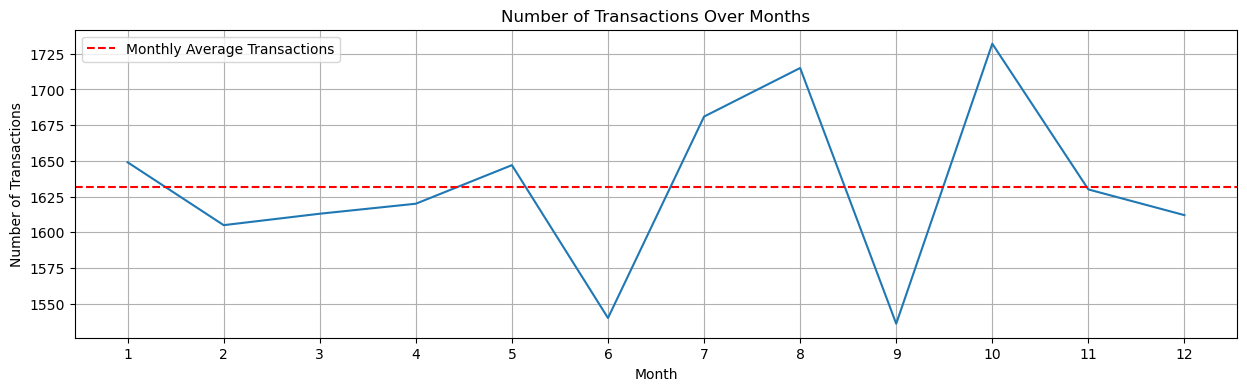

In [31]:
# Create a line plot using Seaborn
plt.figure(figsize=(15, 4))
sns.lineplot(x='month', y='number_of_transaction', data=transaction_per_month)
plt.axhline(y=mean_trans_monthly, color='r', linestyle='--', label='Monthly Average Transactions')
plt.title('Number of Transactions Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(transaction_per_month['month'])  # Display every month on the x-axis
plt.grid(True)  # Add grid lines
plt.legend()
plt.show()

- Transaction volumes experienced a notable **decline, dropping below the average** in **June and September**. Subsequently, in the months following this decline, transaction numbers **rebounded significantly, surpassing the average**, as observed in **August and October**.

<h3><u>4.1.2 Transactions over Day</u></h3>

In [32]:
transaction_per_day = df_all.groupby(['transaction_month','transaction_day'])[['transaction_id']].count()
transaction_per_day.reset_index(inplace=True)
transaction_per_day.columns = ['month', 'day', 'transactions']
transaction_per_day

month  day  transactions
0        1    1            53
1        1    2            46
2        1    3            55
3        1    4            56
4        1    5            63
..     ...  ...           ...
359     12   26            54
360     12   27            51
361     12   28            55
362     12   29            52
363     12   30            47

[364 rows x 3 columns]

<Axes: xlabel='day', ylabel='month'>

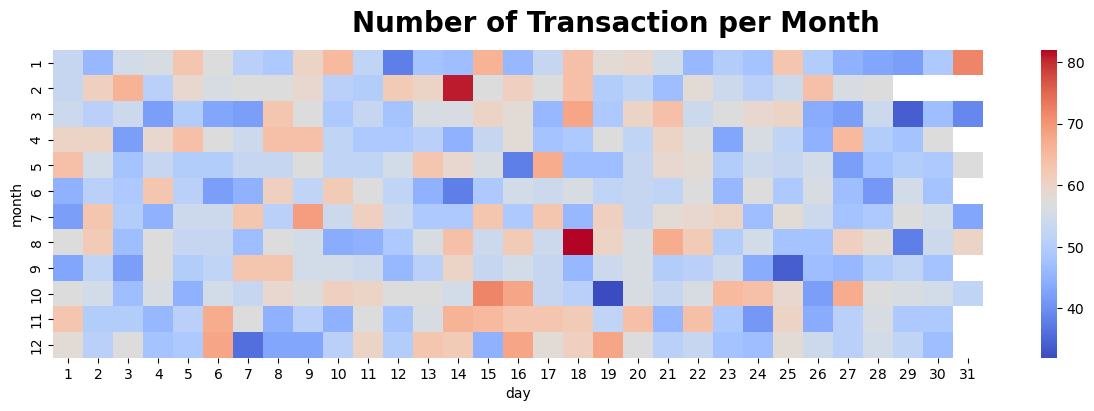

In [33]:
fig, ax = plt.subplots(figsize=(15,4))

fig.suptitle('Number of Transaction per Month', fontsize=20, fontweight='bold')
map = transaction_per_day.pivot('month', 'day', 'transactions')
sns.heatmap(map, cmap='coolwarm')

- Transaction volumes vary daily throughout each month, exhibiting fluctuations and demonstrating **notable spikes** on **February 14th and August 18th**.

<h3><u>4.1.3 Online and Offline Shopping</u></h3>

In [34]:
transaction_per_month = df_all.groupby(['transaction_month'])[['transaction_id']].count()
transaction_per_month.reset_index(inplace=True)
transaction_per_month.columns = ['month', 'number_of_transaction']

In [35]:
online_shopping_trend = df_all.groupby(['transaction_month','online_order'])[['transaction_id']].count()
online_shopping_trend.reset_index(inplace=True)
online_shopping_trend.columns = ['month', 'online_order', 'number_of_transaction']
online_shopping_trend

month  online_order  number_of_transaction
0       1             0                    796
1       1             1                    853
2       2             0                    778
3       2             1                    827
4       3             0                    815
5       3             1                    798
6       4             0                    783
7       4             1                    837
8       5             0                    810
9       5             1                    837
10      6             0                    774
11      6             1                    766
12      7             0                    852
13      7             1                    829
14      8             0                    820
15      8             1                    895
16      9             0                    759
17      9             1                    777
18     10             0                    826
19     10             1                    906
20     11             0                    792
21     11             1                    838
22     12             0                    798
23     12             1                    814

In [36]:
online_shopping_trend = df_all.groupby(['transaction_month', 'online_order'])[['transaction_id', 'profit']].agg({'transaction_id': 'count', 'profit': 'sum'})
online_shopping_trend.reset_index(inplace=True)
online_shopping_trend.columns = ['month', 'online_order', 'number_of_transaction', 'total_profit']
online_shopping_trend

month  online_order  number_of_transaction  total_profit
0       1             0                    796     448489.16
1       1             1                    853     470165.99
2       2             0                    778     408895.85
3       2             1                    827     459832.91
4       3             0                    815     443488.44
5       3             1                    798     429370.67
6       4             0                    783     432819.50
7       4             1                    837     459076.40
8       5             0                    810     462223.15
9       5             1                    837     440943.98
10      6             0                    774     431270.83
11      6             1                    766     414826.80
12      7             0                    852     475113.09
13      7             1                    829     452326.54
14      8             0                    820     474293.72
15      8             1                    895     488206.51
16      9             0                    759     417339.79
17      9             1                    777     432384.10
18     10             0                    826     456065.21
19     10             1                    906     516131.17
20     11             0                    792     449109.17
21     11             1                    838     463310.87
22     12             0                    798     429944.30
23     12             1                    814     447669.45

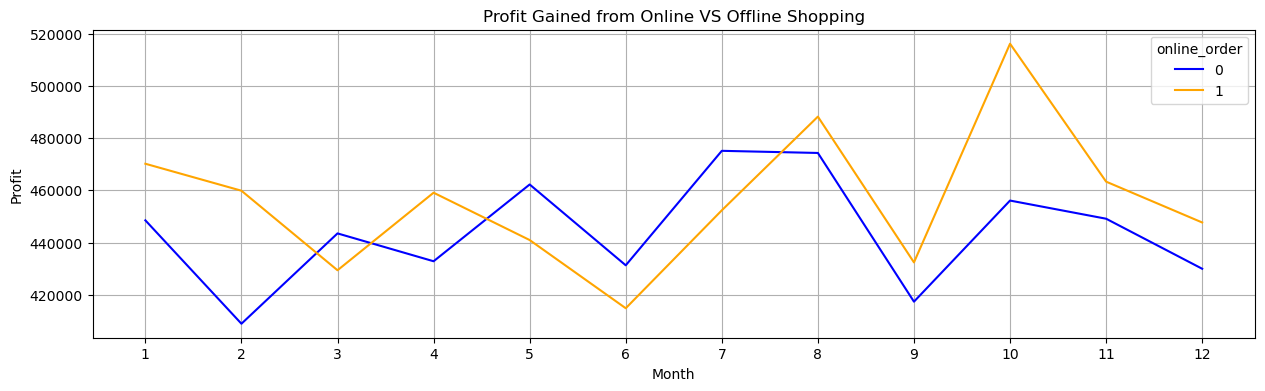

In [37]:
# Set custom colors for online and offline shopping
custom_palette = sns.color_palette(['blue', 'orange'])

# Create a line plot using Seaborn
plt.figure(figsize=(15, 4))
sns.lineplot(x='month', y='total_profit', hue='online_order', legend='brief', data=online_shopping_trend, palette=custom_palette)
plt.title('Profit Gained from Online VS Offline Shopping')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(transaction_per_month['month'])  # Display every month on the x-axis
plt.grid(True)  # Add grid lines
plt.show()

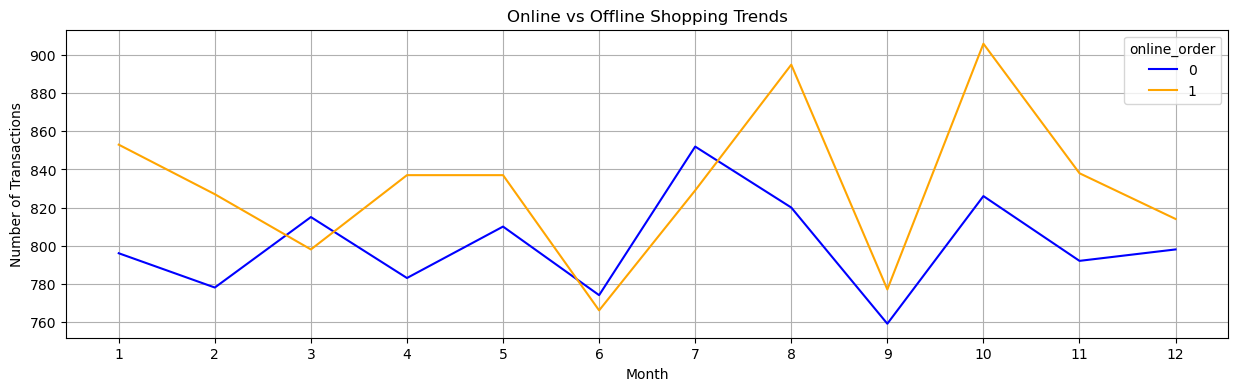

In [38]:
# Set custom colors for online and offline shopping
custom_palette = sns.color_palette(['blue', 'orange'])

# Create a line plot using Seaborn
plt.figure(figsize=(15, 4))
sns.lineplot(x='month', y='number_of_transaction', hue='online_order', legend='brief', data=online_shopping_trend, palette=custom_palette)
plt.title('Online vs Offline Shopping Trends')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(transaction_per_month['month'])  # Display every month on the x-axis
plt.grid(True)  # Add grid lines
plt.show()

- It appears that in some months, online transactions (online_order = 1) have higher numbers compared to offline transactions (online_order = 0), while in other months, offline transactions are more prevalent. This suggests that the mode of transaction (online or offline) may play a role in influencing transaction numbers.

## 4.2 Product Insights

<h3><u>4.2.1 Popularity of Brands over Months</u></h3>

In [39]:
df_all.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'age_class', 'state', 'property_valuation', 'profit',
       'transaction_month', 'transaction_day'],
      dtype='object')

In [40]:
brand_profit = df_all.groupby(['transaction_month', 'brand'])[['transaction_id', 'profit']].agg({'transaction_id': 'count', 'profit': 'sum'})
brand_profit.reset_index(inplace=True)
brand_profit.columns = ['month', 'brand', 'transactions', 'total_profit']
brand_profit

month           brand  transactions  total_profit
0       1  Giant Bicycles           278     126133.42
1       1  Norco Bicycles           243      72896.96
2       1      OHM Cycles           264     133523.37
3       1           Solex           361     209749.92
4       1   Trek Bicycles           225     147601.83
..    ...             ...           ...           ...
67     12  Norco Bicycles           262      71973.04
68     12      OHM Cycles           234     113275.88
69     12           Solex           305     168315.07
70     12   Trek Bicycles           225     136880.01
71     12        WeareA2B           288     245763.83

[72 rows x 4 columns]

In [41]:
brand_profit['brand'].unique()

array(['Giant Bicycles', 'Norco Bicycles', 'OHM Cycles', 'Solex',
       'Trek Bicycles', 'WeareA2B'], dtype=object)

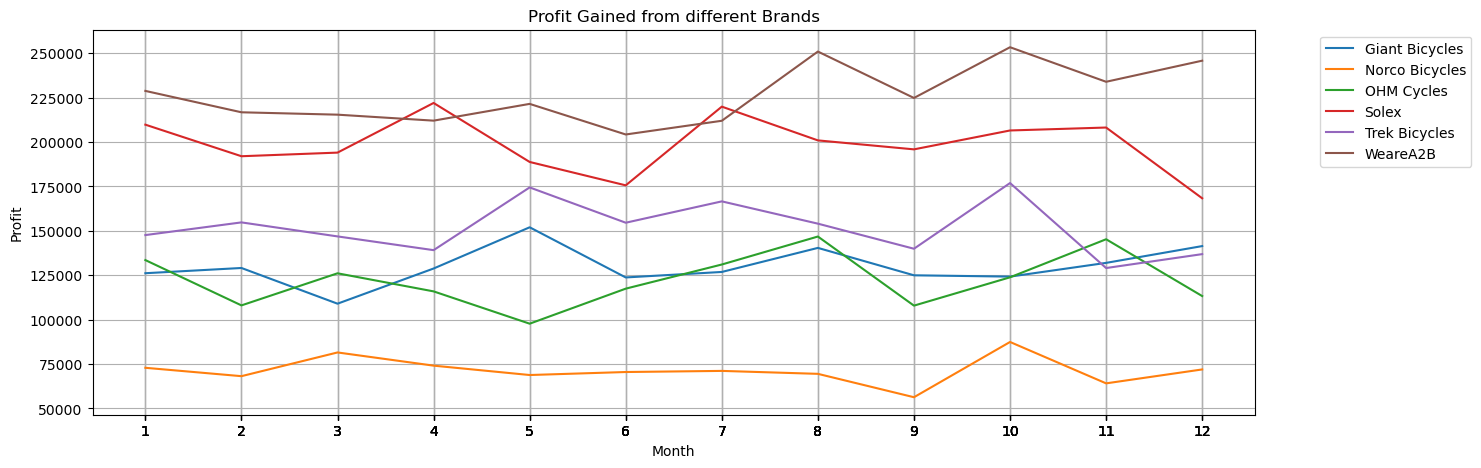

In [42]:
# Create a line plot using Seaborn
plt.figure(figsize=(15, 5))
sns.lineplot(x='month', y='total_profit', hue='brand', legend='brief', data=brand_profit)
plt.title('Profit Gained from different Brands')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(brand_profit['month'])  # Display every month on the x-axis
plt.grid(True)  # Add grid lines
# Position the legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h3><u>4.2.2 Most Popular Brand</u></h3>

In [43]:
# Calculate statistics using value_counts
stat = pd.DataFrame()
selected_columns = ['brand', 'product_line', 'product_class', 'product_size']

for col in selected_columns:
    value_counts = df_all[col].value_counts()
    mode = value_counts.idxmax()
    freq = value_counts.max()
    top_percentage = freq / df_all.shape[0] * 100
    stat[col] = [mode, freq, top_percentage]

stat.index = ['mode', 'freq', 'top_percentage']
stat

brand product_line product_class product_size
mode                Solex     Standard        medium       medium
freq                 4201        14019         13666        12845
top_percentage  21.455567     71.59857      69.79571    65.602656

- **Solex** emerges as the favored brand, constituting **21.46% of all transactions**.
- A significant **71.60%** majority of customers opt for **standard** bicycles.
- A substantial **69.80%** majority of customers lean towards purchasing bicycles in the **medium class**.
- Additionally, **65.60%** of customers show a preference for bicycles of **medium size**.

In [44]:
df_all.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'age_class', 'state', 'property_valuation', 'profit',
       'transaction_month', 'transaction_day'],
      dtype='object')

<h3><u>4.2.3 Product Characteristics</u></h3>

In [45]:
product_data = df_all[['brand','product_line','product_class','product_size','transaction_id','profit']].copy()
#grouped_product_data_all = product_data.groupby(['brand', 'product_line', 'product_class','product_size']).sum()
#grouped_product_data_all

In [46]:
product_data1 = product_data.groupby(['brand'])[['transaction_id']].count()
product_data1.reset_index(inplace=True)
product_data1.columns = ['brand','transactions']
product_data1

brand  transactions
0  Giant Bicycles          3278
1  Norco Bicycles          2878
2      OHM Cycles          3010
3           Solex          4201
4   Trek Bicycles          2958
5        WeareA2B          3255

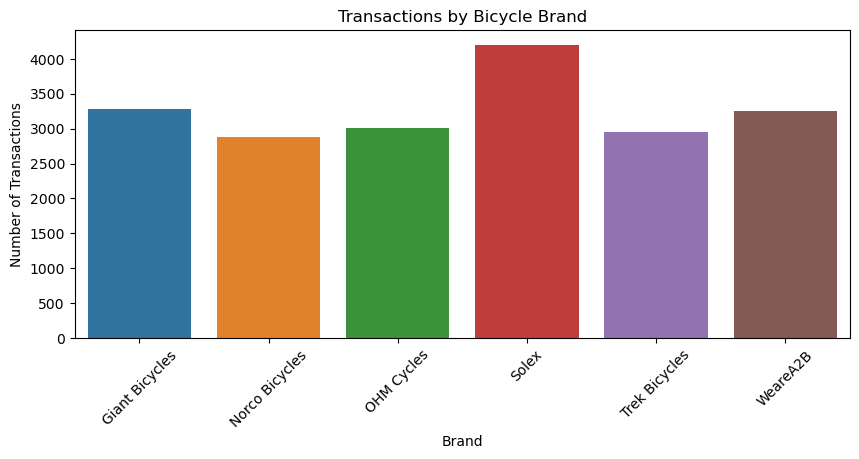

In [47]:
plt.figure(figsize=(10, 4))
sns.barplot(data=product_data1, x='brand', y='transactions')
plt.title('Transactions by Bicycle Brand')
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Number of Transactions')
plt.show()

In [48]:
product_data2 = product_data.groupby(['brand','product_line'])[['transaction_id']].count()
product_data2.reset_index(inplace=True)
product_data2.columns = ['brand', 'product_line','transactions']
pivot_table2 = product_data2.pivot_table(index='brand', columns='product_line', values='transactions', fill_value=0)
pivot_table2

product_line    Mountain  Road  Standard  Touring
brand                                            
Giant Bicycles         0   574      2526      178
Norco Bicycles       198   910      1770        0
OHM Cycles             0   769      2013      228
Solex                  0   527      3470      204
Trek Bicycles        219   987      1752        0
WeareA2B               0   155      2488      612

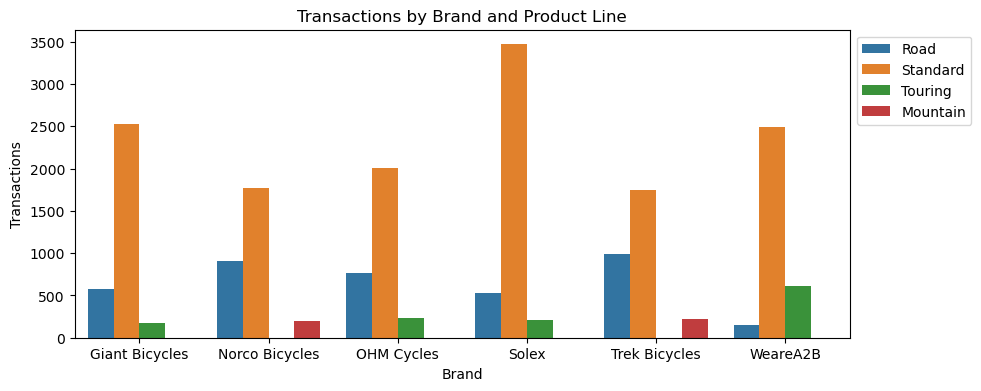

In [49]:
# Create the barplot
plt.figure(figsize=(10, 4))
sns.barplot(x="brand", y="transactions", hue="product_line", data=product_data2)
plt.xlabel("Brand")
plt.ylabel("Transactions")
plt.title("Transactions by Brand and Product Line")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [50]:
product_data3 = product_data.groupby(['brand','product_size'])[['transaction_id']].count()
product_data3.reset_index(inplace=True)
product_data3.columns = ['brand', 'product_size','transactions']
pivot_table3 = product_data3.pivot_table(index='brand', columns='product_size', values='transactions', fill_value=0)
pivot_table3

product_size    large  medium  small
brand                               
Giant Bicycles    940    1760    578
Norco Bicycles    404    1714    760
OHM Cycles        194    2619    197
Solex            1075    2945    181
Trek Bicycles     893    1524    541
WeareA2B          425    2283    547

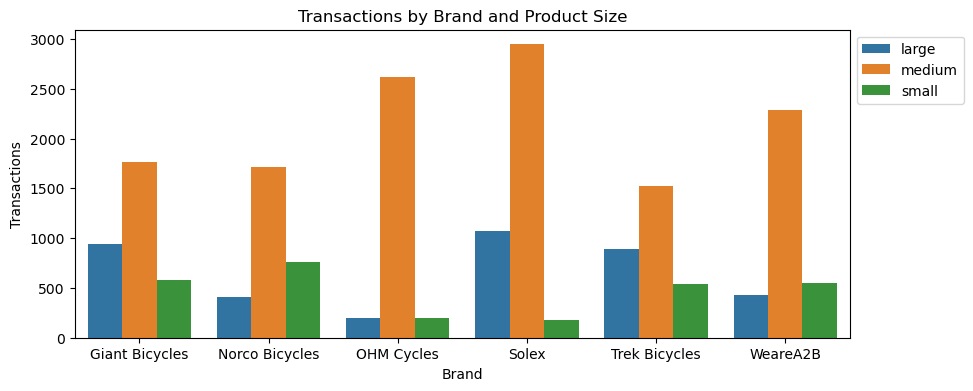

In [51]:
# Create the barplot
plt.figure(figsize=(10,4))
sns.barplot(x="brand", y="transactions", hue="product_size", data=product_data3)
plt.xlabel("Brand")
plt.ylabel("Transactions")
plt.title("Transactions by Brand and Product Size")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [52]:
product_data4 = product_data.groupby(['brand','product_class'])[['transaction_id']].count()
product_data4.reset_index(inplace=True)
product_data4.columns = ['brand', 'product_class','transactions']
pivot_table4 = product_data4.pivot_table(index='brand', columns='product_class', values='transactions', fill_value=0)
pivot_table4

product_class   high  low  medium
brand                            
Giant Bicycles   775  194    2309
Norco Bicycles   561  626    1691
OHM Cycles       764  606    1640
Solex            557  407    3237
Trek Bicycles    319  778    1861
WeareA2B           0  327    2928

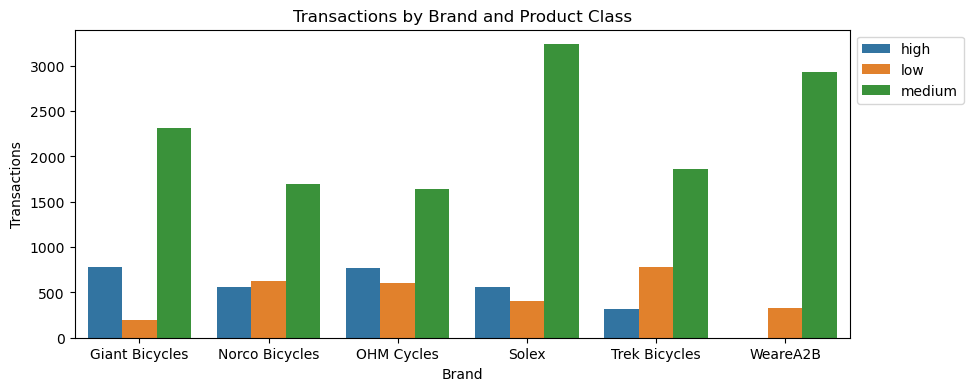

In [53]:
# Create the barplot
plt.figure(figsize=(10,4))
sns.barplot(x="brand", y="transactions", hue="product_class", data=product_data4)
plt.xlabel("Brand")
plt.ylabel("Transactions")
plt.title("Transactions by Brand and Product Class")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## 4.3 Customer Insights

In [54]:
df_all.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'age_class', 'state', 'property_valuation', 'profit',
       'transaction_month', 'transaction_day'],
      dtype='object')

In [55]:
df_all_original = df_all.copy()

In [56]:
customer_data = df_all[['transaction_id','customer_id','gender','job_title','job_industry_category',
                        'wealth_segment','owns_car','age_class','state','property_valuation','tenure',
                        'profit']].copy()

<h3><u>4.3.1 Customer Overview</u></h3>

In [57]:
customer_data.select_dtypes(include='object').columns

Index(['transaction_id', 'customer_id', 'gender', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'age_class',
       'state'],
      dtype='object')

In [58]:
# Calculate statistics using value_counts
stat = pd.DataFrame()
selected_columns = ['transaction_id', 'customer_id', 'gender', 'job_title',
                       'job_industry_category', 'wealth_segment', 'owns_car', 'age_class',
                       'state']

for col in selected_columns:
    value_counts = df_all[col].value_counts()
    mode = value_counts.idxmax()
    freq = value_counts.max()
    top_percentage = freq / df_all.shape[0] * 100
    stat[col] = [mode, freq, top_percentage]

stat.index = ['mode', 'freq', 'top_percentage']
stat

transaction_id  customer_id   gender        job_title  \
mode                  1.000000  2183.000000   Female  Legal Assistant   
freq                  1.000000    14.000000    10245              252   
top_percentage        0.005107     0.071502  52.3238         1.287028   

               job_industry_category wealth_segment   owns_car  age_class  \
mode                   Manufacturing  Mass Customer        Yes      40-49   
freq                            4689           9835       9864       5886   
top_percentage             23.947906      50.229826  50.377937  30.061287   

                    state  
mode                  NSW  
freq                10458  
top_percentage  53.411645

- Customer ID **2183** appears most frequently, accounting for **14 instances** of transactions.
- The prevalent gender among customers is **Female**, constituting **52.32%** of the total.
- The most commonly reported job title is **Legal Assistant**, representing **1.29%** of customers.
- A notable segment of customers, **23.95%**, is affiliated with the **manufacturing industry**.
- A significant **50.23%** of customers fall under the **Mass Customer** wealth segment.
- **Car ownership** is indicated for **50.38%** of the customer base.
- **30.06%** of customers fall within the **40-49** age range.
- A majority of **53.41%** of customers are located in the state of **NSW**.

<h3><u>4.3.2 Gender</u></h3>

Create a function to reduce the needs of writing repetitive codes.

In [59]:
def calculate_percentage_data(data, column_name):
    grouped_data = data.groupby([column_name])[['transaction_id']].count().reset_index()
    total = grouped_data['transaction_id'].sum()
    grouped_data['percentage'] = round((grouped_data['transaction_id'] / total) * 100, 2)
    grouped_data.columns = [column_name, 'transactions', 'percentage']
    grouped_data.sort_values('percentage', ascending=False, inplace=True)
    grouped_data.reset_index(drop=True, inplace=True)
    return grouped_data


def plot_percentage_data(data, column_name):
    # Calculate percentage
    grouped_data = data.groupby([column_name])[['transaction_id']].count().reset_index()
    total = grouped_data['transaction_id'].sum()
    grouped_data['percentage'] = round((grouped_data['transaction_id'] / total) * 100, 2)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column_name, y='percentage', data=grouped_data)
    plt.title('Percentage Distribution by ' + column_name)
    plt.show()


In [60]:
customer_data.describe(include='object')

transaction_id  customer_id  gender        job_title  \
count            19580        19580   19580            19580   
unique           19580         3486       2              195   
top                  1         2183  Female  Legal Assistant   
freq                 1           14   10245              252   

       job_industry_category wealth_segment owns_car age_class  state  
count                  19580          19580    19580     19580  19580  
unique                     9              3        2         8      3  
top            Manufacturing  Mass Customer      Yes     40-49    NSW  
freq                    4689           9835     9864      5886  10458

In [61]:
column_interested = 'gender'
result_data = calculate_percentage_data(customer_data,column_interested)
result_data.head()

gender  transactions  percentage
0  Female         10245       52.32
1    Male          9335       47.68

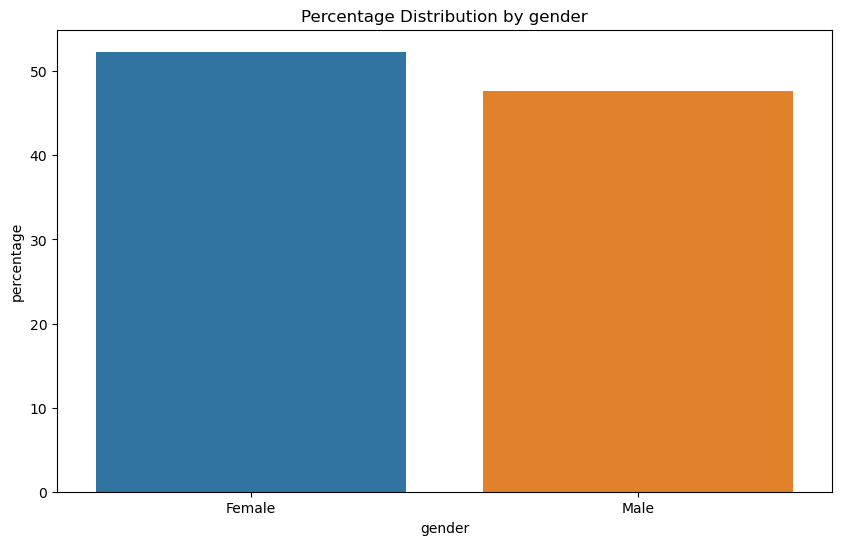

In [62]:
column_interested = 'gender'
plot_percentage_data(customer_data, column_interested)

<h3><u>4.3.3 Job Title</u></h3>

In [63]:
column_interested = 'job_title'
result_data = calculate_percentage_data(customer_data,column_interested)
result_data.head()

job_title  transactions  percentage
0                       Legal Assistant           252        1.29
1  Business Systems Development Analyst           243        1.24
2                         Social Worker           238        1.22
3                     Chemical Engineer           235        1.20
4                   Assistant Professor           233        1.19

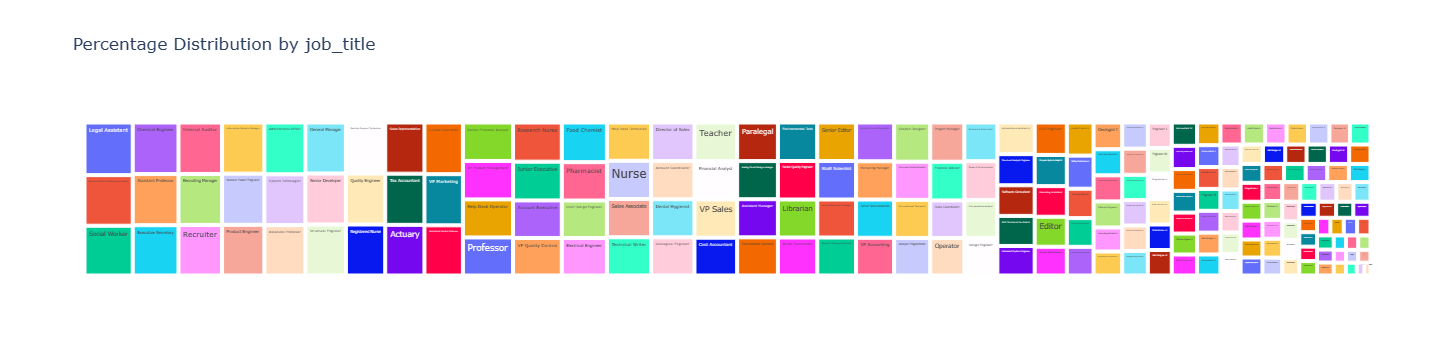

In [64]:
import plotly.express as px

def plot_treemap(data, column_name):
    # Calculate percentage
    grouped_data = data.groupby([column_name])[['transaction_id']].count().reset_index()
    total = grouped_data['transaction_id'].sum()
    grouped_data['percentage'] = round((grouped_data['transaction_id'] / total) * 100, 2)
    
    # Plot
    fig = px.treemap(grouped_data, path=[column_name], values='percentage',
                    title='Percentage Distribution by ' + column_name)
    fig.show()

# Use the function
column_interested = 'job_title'
plot_treemap(customer_data, column_interested)


<h3><u>4.3.4 Job Industry Category</u></h3>

In [65]:
column_interested = 'job_industry_category'
result_data = calculate_percentage_data(customer_data,column_interested)
result_data.head()

job_industry_category  transactions  percentage
0         Manufacturing          4689       23.95
1    Financial Services          4527       23.12
2                Health          3591       18.34
3                Retail          2080       10.62
4              Property          1525        7.79

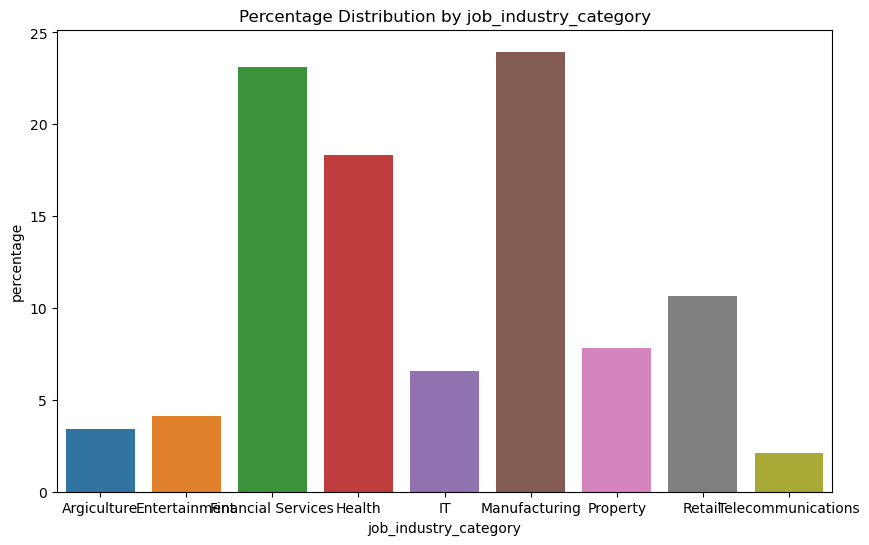

In [66]:
column_interested = 'job_industry_category'
plot_percentage_data(customer_data, column_interested)

<h3><u>4.3.5 Wealth Segment</u></h3>

In [67]:
column_interested = 'wealth_segment'
result_data = calculate_percentage_data(customer_data,column_interested)
result_data.head()

wealth_segment  transactions  percentage
0      Mass Customer          9835       50.23
1     High Net Worth          5001       25.54
2  Affluent Customer          4744       24.23

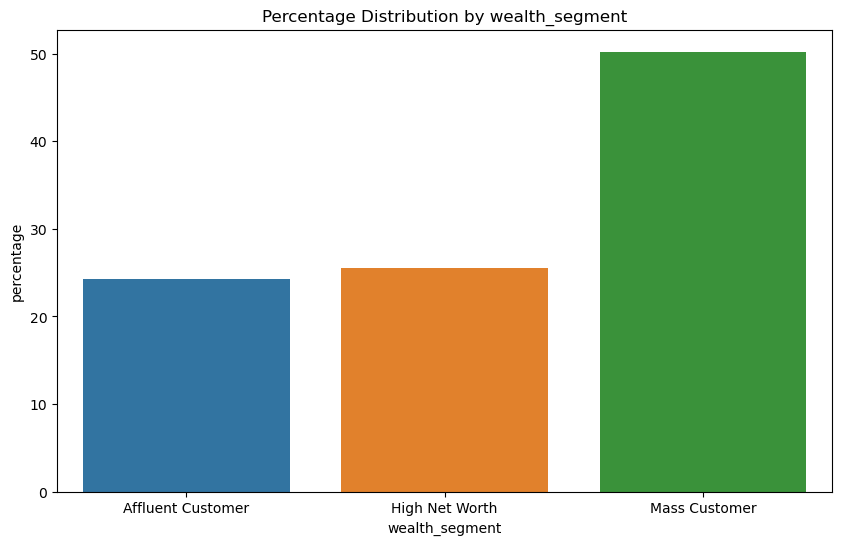

In [68]:
column_interested = 'wealth_segment'
plot_percentage_data(customer_data, column_interested)

<h3><u>4.3.6 Car Ownership</u></h3>

In [69]:
column_interested = 'owns_car'
result_data = calculate_percentage_data(customer_data,column_interested)
result_data.head()

owns_car  transactions  percentage
0      Yes          9864       50.38
1       No          9716       49.62

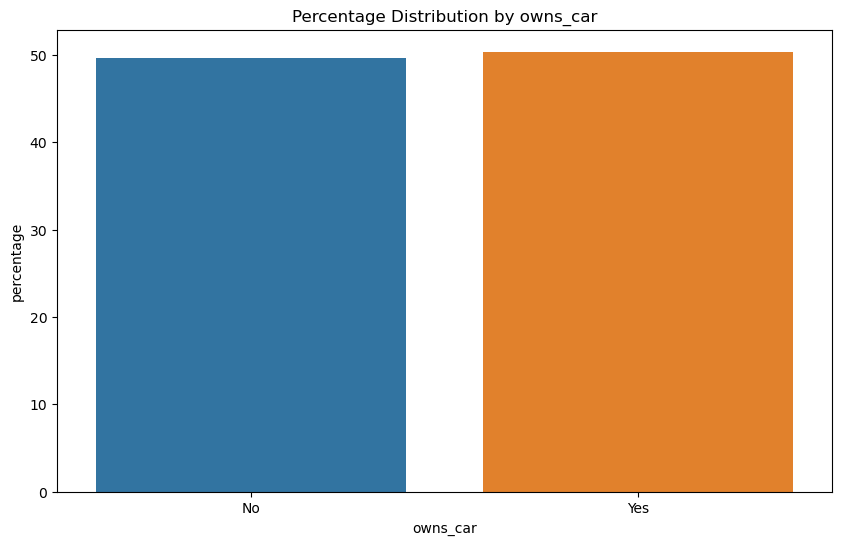

In [70]:
column_interested = 'owns_car'
plot_percentage_data(customer_data, column_interested)

<h3><u>4.3.7 Age Class</u></h3>

In [71]:
column_interested = 'age_class'
result_data = calculate_percentage_data(customer_data,column_interested)
result_data.head()

age_class  transactions  percentage
0     40-49          5886       30.06
1     50-59          3948       20.16
2     30-39          3583       18.30
3     60-69          3325       16.98
4     20-29          2489       12.71

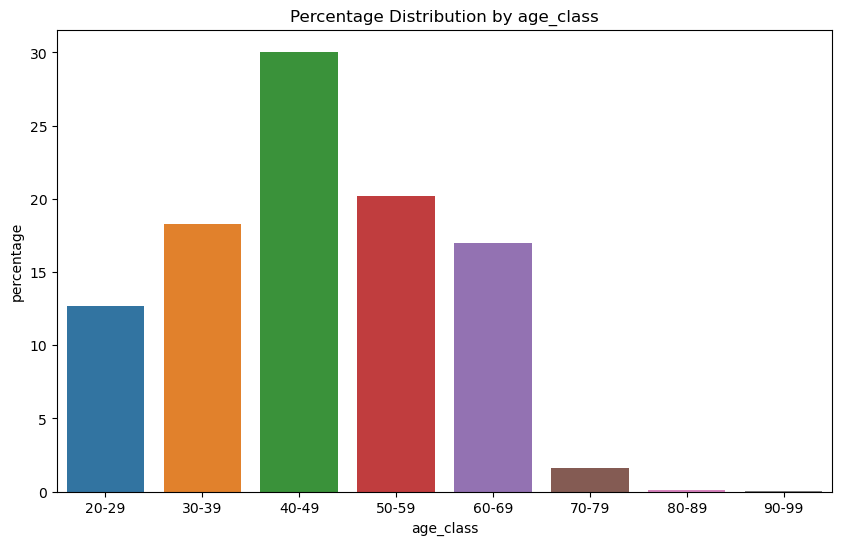

In [72]:
column_interested = 'age_class'
plot_percentage_data(customer_data, column_interested)

<h3><u>4.3.8 State of Residency</u></h3>

In [73]:
column_interested = 'state'
result_data = calculate_percentage_data(customer_data,column_interested)
result_data.head()

state  transactions  percentage
0   NSW         10458       53.41
1   VIC          4942       25.24
2   QLD          4180       21.35

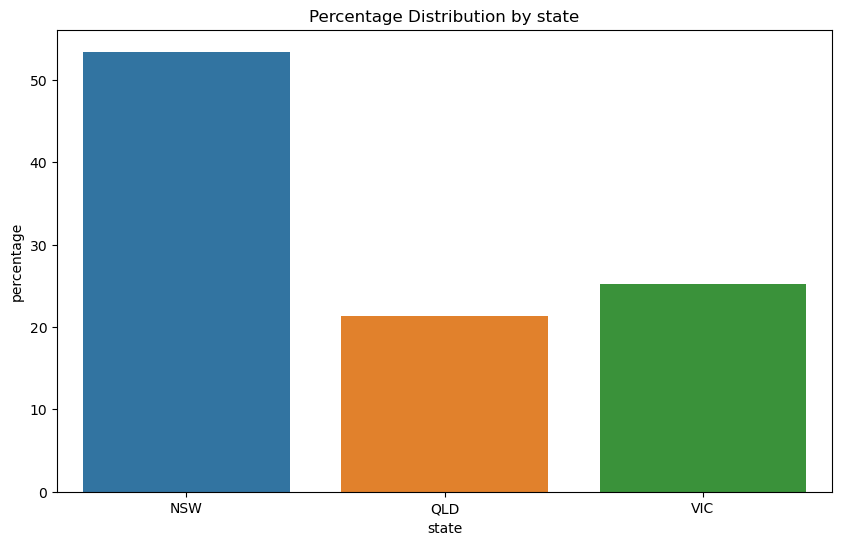

In [74]:
column_interested = 'state'
plot_percentage_data(customer_data, column_interested)

- Customer ID **2183** appears most frequently, accounting for **14 instances** of transactions.
- The prevalent gender among customers is **Female**, constituting **52.32%** of the total.
- The most commonly reported job title is **Legal Assistant**, representing **1.29%** of customers.
- A notable segment of customers, **23.95%**, is affiliated with the **manufacturing industry**.
- A significant **50.23%** of customers fall under the **Mass Customer** wealth segment.
- **Car ownership** is indicated for **50.38%** of the customer base.
- **30.06%** of customers fall within the **40-49** age range.
- A majority of **53.41%** of customers are located in the state of **NSW**.

# 5. RFM Analysis

## 5.1 Calculating R, F, M

<h3><u>5.1.1 Recency, Frequency, Monetary</u></h3>

In [75]:
df_rfm = df_all.copy()

In [76]:
df_rfm_original = df_rfm.copy()

In [77]:
df_rfm['transaction_date'] = pd.to_datetime(df_rfm['transaction_date'])
latest_transaction = df_rfm['transaction_date'].max()
df_rfm['last_purchase_days_ago'] = (latest_transaction - df_rfm['transaction_date']).dt.days

unique_days = df_rfm['last_purchase_days_ago'].unique()
df_rfm.head(5)

transaction_id product_id customer_id transaction_date online_order  \
0              1          2        2950       2017-02-25            0   
1          11065          1        2950       2017-10-16            0   
2          18923         62        2950       2017-04-26            0   
3              2          3        3120       2017-05-21            1   
4           6862          4        3120       2017-10-05            0   

            brand product_line product_class product_size  list_price  ...  \
0           Solex     Standard        medium       medium       71.49  ...   
1  Giant Bicycles     Standard        medium       medium     1403.50  ...   
2           Solex     Standard        medium       medium      478.16  ...   
3   Trek Bicycles     Standard        medium        large     2091.47  ...   
4  Giant Bicycles     Standard          high       medium     1129.13  ...   

   wealth_segment owns_car tenure  age_class state property_valuation  \
0   Mass Customer      Yes     10      60-69   VIC                  6   
1   Mass Customer      Yes     10      60-69   VIC                  6   
2   Mass Customer      Yes     10      60-69   VIC                  6   
3   Mass Customer      Yes     10      40-49   NSW                  5   
4   Mass Customer      Yes     10      40-49   NSW                  5   

    profit transaction_month  transaction_day last_purchase_days_ago  
0    17.87                 2               25                    308  
1   448.68                10               16                     75  
2   179.44                 4               26                    248  
3  1702.55                 5               21                    223  
4   451.65                10                5                     86  

[5 rows x 26 columns]

In [78]:
rfm_table = df_rfm.groupby(['customer_id'])[['last_purchase_days_ago','transaction_id','profit']].agg({'last_purchase_days_ago':'min','transaction_id': 'count', 'profit': 'sum'})
rfm_table.reset_index(inplace=True)
rfm_table.columns = ['customer_id','recency','frequency','monetary']
rfm_table

customer_id  recency  frequency  monetary
0               1        7         11   3018.09
1               2      128          3   2226.26
2               4      195          2    220.57
3               5       16          6   2394.94
4               6       64          5   3946.55
...           ...      ...        ...       ...
3481         3496      256          4   2045.84
3482         3497       52          3   1648.32
3483         3498      127          6   3147.33
3484         3499       51          7   4955.25
3485         3500      144          6   1785.86

[3486 rows x 4 columns]

In [79]:
rfm_table.describe()

customer_id      recency    frequency      monetary
count  3486.000000  3486.000000  3486.000000   3486.000000
mean   1753.105278    61.799197     5.616753   3099.052668
std    1008.956031    58.602822     2.297274   1762.994404
min       1.000000     0.000000     1.000000     15.080000
25%     881.250000    17.000000     4.000000   1826.490000
50%    1753.500000    44.000000     5.000000   2839.035000
75%    2625.750000    86.750000     7.000000   4144.692500
max    3500.000000   353.000000    14.000000  11668.950000

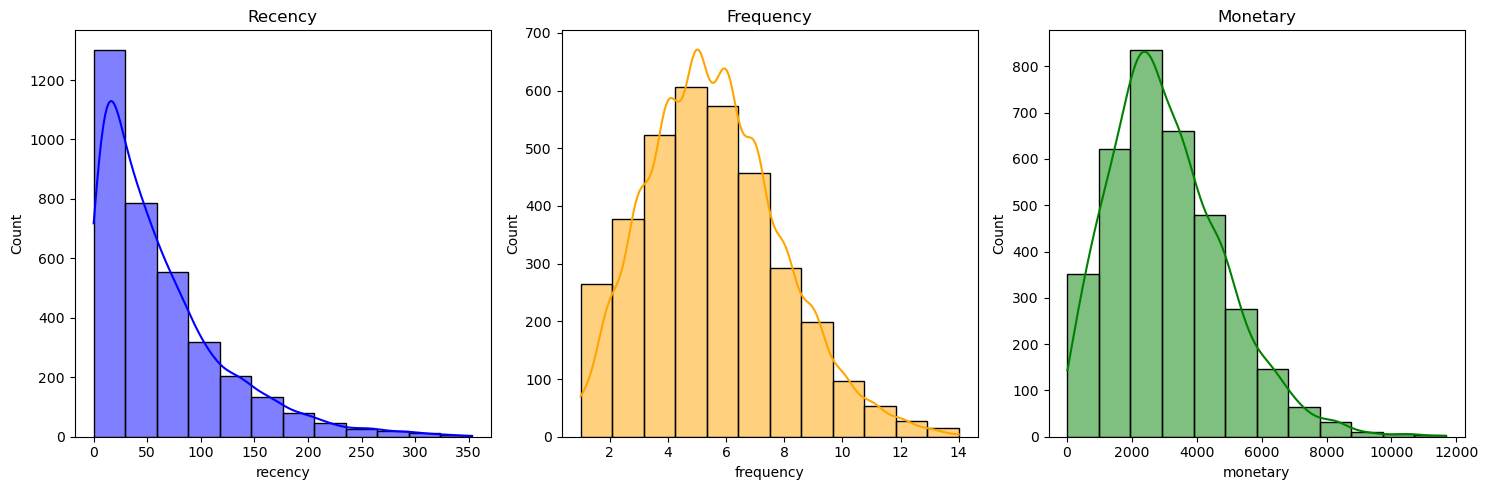

In [80]:
bin_value = 12

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create histograms using Seaborn for each column
sns.histplot(data=rfm_table, x='recency', bins=bin_value, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Recency')

sns.histplot(data=rfm_table, x='frequency', bins=bin_value, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Frequency')

sns.histplot(data=rfm_table, x='monetary', bins=bin_value, kde=True, color='green', ax=axes[2])
axes[2].set_title('Monetary')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [81]:
rfm_table_original = rfm_table.copy()

In [82]:
rfm_table = rfm_table_original.copy()

In [83]:
rfm_table

customer_id  recency  frequency  monetary
0               1        7         11   3018.09
1               2      128          3   2226.26
2               4      195          2    220.57
3               5       16          6   2394.94
4               6       64          5   3946.55
...           ...      ...        ...       ...
3481         3496      256          4   2045.84
3482         3497       52          3   1648.32
3483         3498      127          6   3147.33
3484         3499       51          7   4955.25
3485         3500      144          6   1785.86

[3486 rows x 4 columns]

In [84]:
rfm_table.to_csv('data/rfm_customer_data.csv',index=False)

Machine learning approach end here as the dataset required to do machine learning segmentation is already prepared (Proceed to next notebook)

'''
**CONTINUING MANUAL APPROACH TO SEGMENT CUSTOMER**
'''

## 5.2 Scoring

<h3><u>5.2.1 Calculating Score for R, F, M</u></h3>

Create a scoring criteria using quartiles.

In [85]:
quartiles = rfm_table[['recency', 'frequency', 'monetary']].quantile([0.33, 0.66])

# Define score functions based on quartiles
def assign_score(value, quartile_values):
    if value <= quartile_values[0.33]:
        return 1
    elif value <= quartile_values[0.66]:
        return 2
    else:
        return 3

# Define score functions based on quartiles
def assign_score_recency(value, quartile_values):
    if value <= quartile_values[0.33]:
        return 3
    elif value <= quartile_values[0.66]:
        return 2
    else:
        return 1

In [86]:
# Apply scoring functions
for col in ['recency']:
    rfm_table[col + '_score'] = rfm_table[col].apply(assign_score_recency, args=(quartiles[col],))

for col in ['frequency', 'monetary']:
    rfm_table[col + '_score'] = rfm_table[col].apply(assign_score, args=(quartiles[col],)) 
    
# Calculate RFM score (concatenation)
rfm_table['rfm_segment'] = rfm_table['recency_score'].astype(str) + rfm_table['frequency_score'].astype(str) + rfm_table['monetary_score'].astype(str)

rfm_table

customer_id  recency  frequency  monetary  recency_score  \
0               1        7         11   3018.09              3   
1               2      128          3   2226.26              1   
2               4      195          2    220.57              1   
3               5       16          6   2394.94              3   
4               6       64          5   3946.55              2   
...           ...      ...        ...       ...            ...   
3481         3496      256          4   2045.84              1   
3482         3497       52          3   1648.32              2   
3483         3498      127          6   3147.33              1   
3484         3499       51          7   4955.25              2   
3485         3500      144          6   1785.86              1   

      frequency_score  monetary_score rfm_segment  
0                   3               2         332  
1                   1               2         112  
2                   1               1         111  
3                   2               2         322  
4                   2               3         223  
...               ...             ...         ...  
3481                1               1         111  
3482                1               1         211  
3483                2               2         122  
3484                3               3         233  
3485                2               1         121  

[3486 rows x 8 columns]

In [87]:
rfm_table['rfm_segment'].nunique()

27

<h3><u>5.2.2 RFM Score</u></h3>

In [88]:
rfm_table['RFM_score'] = ((rfm_table['recency_score'].astype('int64') + rfm_table['frequency_score'].astype('int64') + rfm_table['monetary_score'].astype('int64')) / 3).round(2)


In [89]:
rfm_table

customer_id  recency  frequency  monetary  recency_score  \
0               1        7         11   3018.09              3   
1               2      128          3   2226.26              1   
2               4      195          2    220.57              1   
3               5       16          6   2394.94              3   
4               6       64          5   3946.55              2   
...           ...      ...        ...       ...            ...   
3481         3496      256          4   2045.84              1   
3482         3497       52          3   1648.32              2   
3483         3498      127          6   3147.33              1   
3484         3499       51          7   4955.25              2   
3485         3500      144          6   1785.86              1   

      frequency_score  monetary_score rfm_segment  RFM_score  
0                   3               2         332       2.67  
1                   1               2         112       1.33  
2                   1               1         111       1.00  
3                   2               2         322       2.33  
4                   2               3         223       2.33  
...               ...             ...         ...        ...  
3481                1               1         111       1.00  
3482                1               1         211       1.33  
3483                2               2         122       1.67  
3484                3               3         233       2.67  
3485                2               1         121       1.33  

[3486 rows x 9 columns]

## 5.3 Customers Segment 

In [90]:
rfm_table_original = rfm_table.copy()

In [91]:
rfm_table = rfm_table_original.copy()

In [92]:
rfm_table.head(2)

customer_id  recency  frequency  monetary  recency_score  frequency_score  \
0            1        7         11   3018.09              3                3   
1            2      128          3   2226.26              1                1   

   monetary_score rfm_segment  RFM_score  
0               2         332       2.67  
1               2         112       1.33

In [93]:
rfm_table['rfm_segment'].unique()

array(['332', '112', '111', '322', '223', '333', '122', '232', '233',
       '211', '221', '123', '321', '132', '212', '323', '312', '113',
       '133', '331', '121', '222', '311', '213', '231', '131', '313'],
      dtype=object)

| Recency           | Frequency             | Monetary            |
| ----------------- | --------------------- | ------------------- |
| 1 (least recent)  | 1 (least frequent)    | 1 (lowest spend)    |
| 2                 | 2                     | 2                   |
| 3 (most recent)   | 3 (most frequent)     | 3 (highest spend)   |

**Customer Segments**
| Segment          | RFM Combinations       | Description                                       | Marketing Strategy                                |
|------------------|------------------------|---------------------------------------------------|---------------------------------------------------|
| Best             | 333                    | High spending, frequent, recent                  | Offer exclusive loyalty rewards                  |
| Loyal            | 131, 132, 232, 332 , 133, 233     | High frequency, moderate spending, recent        | Provide loyalty discounts and special offers     |
| Whales           | 323, 223, 123, 213     | High spending, less frequent, recent             | Upsell premium products or services              |
| Promising        | 231, 331, 322, 321     | Moderate spending, moderate frequency, recent   | Introduce new products or features               |
| Potential Loyal  | 221, 222               | Moderate spending, low frequency, recent        | Offer incentives for repeat purchases            |
| Rookies          | 313, 312, 311          | Low spending, moderate frequency, recent        | Welcome series and onboarding                   |
| Attention        | 212, 122               | Moderate spending, very frequent, not recent    | Remind about abandoned items or incomplete actions|
| Slipping         | 112, 113, 211, 121     | Decreasing frequency, decreasing spending       | Re-engage with targeted win-back campaigns       |
| Dormant          | 111                    | Lowest spending, least frequent, not recent     | Reactivation campaigns or special discounts      |




<h3><u>5.3.1 Score Labelling</u></h3>

In [94]:
#rfm_table_example = rfm_table.copy()

In [95]:
#rfm_table = rfm_table_example.copy()

In [96]:
quartiles = rfm_table[['RFM_score']].quantile([0.33, 0.66])

# Define score functions based on quartiles
def assign_score(value, quartile_values):
    if value <= quartile_values[0.33]:
        return 'Bronze'
    elif value <= quartile_values[0.66]:
        return 'Silver'
    else:
        return 'Diamond'


In [97]:
for col in ['RFM_score']:
    rfm_table['score'] = rfm_table[col].apply(assign_score, args=(quartiles[col],))

rfm_table.head()

customer_id  recency  frequency  monetary  recency_score  frequency_score  \
0            1        7         11   3018.09              3                3   
1            2      128          3   2226.26              1                1   
2            4      195          2    220.57              1                1   
3            5       16          6   2394.94              3                2   
4            6       64          5   3946.55              2                2   

   monetary_score rfm_segment  RFM_score    score  
0               2         332       2.67  Diamond  
1               2         112       1.33   Bronze  
2               1         111       1.00   Bronze  
3               2         322       2.33   Silver  
4               3         223       2.33   Silver

In [98]:
rfm_table['rfm_segment'].nunique()

27

<h3><u>5.3.2 Segment Labelling</u></h3>

**Customer Segments**
| Segment          | RFM Combinations       | Description                                       | Marketing Strategy                                |
|------------------|------------------------|---------------------------------------------------|---------------------------------------------------|
| Best             | 333                    | High spending, frequent, recent                  | Offer exclusive loyalty rewards                  |
| Loyal            | 131, 132, 232, 332      | High frequency, moderate spending, recent        | Provide loyalty discounts and special offers     |
| Whales           | 323, 223, 123, 213 , 133, 233    | High spending, less frequent, recent             | Upsell premium products or services              |
| Promising        | 231, 331, 322, 321     | Moderate spending, moderate frequency, recent   | Introduce new products or features               |
| Potential Loyal  | 221, 222               | Moderate spending, low frequency, recent        | Offer incentives for repeat purchases            |
| Rookies          | 313, 312, 311          | Low spending, moderate frequency, recent        | Welcome series and onboarding                   |
| Attention        | 212, 122               | Moderate spending, very frequent, not recent    | Remind about abandoned items or incomplete actions|
| Slipping         | 112, 113, 211, 121     | Decreasing frequency, decreasing spending       | Re-engage with targeted win-back campaigns       |
| Dormant          | 111                    | Lowest spending, least frequent, not recent     | Reactivation campaigns or special discounts      |




In [99]:
#rfm_table = rfm_table_example.copy()

In [100]:
def assign_segment(rfm_table):
    # Define a dictionary that maps RFM segments to customer segments
    segmentation_mapping = {
        'Best': ['333'],
        'Loyal': ['232', '332', '233' ],
        'Whales': ['323', '223', '123', '213', '133'],
        'Promising': ['231', '331', '322', '321'],
        'Potential': ['221', '222'],
        'Rookies': ['313', '312', '311'],
        'Attention': ['212', '122', '131', '132'],
        'Slipping': ['112', '113', '211', '121'],
        'Dormant': ['111']
    }

    # Use the 'apply' function to create a new 'segmentation' column based on 'rfm_segment'
    rfm_table['segmentation'] = rfm_table['rfm_segment'].apply(
        lambda x: next((seg for seg, scores in segmentation_mapping.items() if x in scores), None)
    )

    

In [101]:
# Call the function to assign customer segments
assign_segment(rfm_table)

# Display the updated DataFrame
rfm_table.head()

customer_id  recency  frequency  monetary  recency_score  frequency_score  \
0            1        7         11   3018.09              3                3   
1            2      128          3   2226.26              1                1   
2            4      195          2    220.57              1                1   
3            5       16          6   2394.94              3                2   
4            6       64          5   3946.55              2                2   

   monetary_score rfm_segment  RFM_score    score segmentation  
0               2         332       2.67  Diamond        Loyal  
1               2         112       1.33   Bronze     Slipping  
2               1         111       1.00   Bronze      Dormant  
3               2         322       2.33   Silver    Promising  
4               3         223       2.33   Silver       Whales

In [102]:
rfm_table['segmentation'].isnull().sum()

0

## 5.4 Customer Insights based on RFM Analysis

In [103]:
def calculate_percentage_profit(data, column_name):
    grouped_data = data.groupby([column_name])[['monetary']].sum().reset_index()
    total = grouped_data['monetary'].sum()
    grouped_data['percentage'] = round((grouped_data['monetary'] / total) * 100, 2)
    grouped_data.columns = [column_name, 'profit', 'percentage']
    grouped_data.sort_values('percentage', ascending=False, inplace=True)
    grouped_data.reset_index(drop=True, inplace=True)
    return grouped_data

def calculate_percentage_count(data, column_name):
    grouped_data = data.groupby([column_name])[['customer_id']].count().reset_index()
    total = data.shape[0]
    grouped_data['percentage'] = round((grouped_data['customer_id'] / total) * 100, 2)
    grouped_data.columns = [column_name, 'count', 'percentage']
    grouped_data.sort_values('percentage', ascending=False, inplace=True)
    grouped_data.reset_index(drop=True, inplace=True)
    return grouped_data

In [104]:
column_interested = 'score'
result_score1 = calculate_percentage_profit(rfm_table,column_interested)
result_score1

score      profit  percentage
0  Diamond  4453679.45       41.23
1   Silver  3854129.31       35.68
2   Bronze  2495488.84       23.10

In [105]:
column_interested = 'score'
result_score2 = calculate_percentage_count(rfm_table,column_interested)
result_score2

score  count  percentage
0   Bronze   1434       41.14
1   Silver   1153       33.08
2  Diamond    899       25.79

- **Diamond** customers contributed to **41.23%** profit for the company followed by **Silver** customers contributed to **35.68%** profit for the company.

In [106]:
column_interested = 'segmentation'
result_seg1 = calculate_percentage_profit(rfm_table,column_interested)
result_seg1

segmentation      profit  percentage
0        Loyal  2354250.52       21.79
1       Whales  2307046.90       21.36
2         Best  1909963.14       17.68
3    Attention   926978.63        8.58
4     Slipping   879323.36        8.14
5    Promising   716120.26        6.63
6    Potential   693950.84        6.42
7      Rookies   556518.46        5.15
8      Dormant   459145.49        4.25

In [107]:
column_interested = 'segmentation'
result_seg2 = calculate_percentage_count(rfm_table,column_interested)
result_seg2

segmentation  count  percentage
0        Loyal    546       15.66
1       Whales    493       14.14
2     Slipping    454       13.02
3      Dormant    427       12.25
4         Best    352       10.10
5    Attention    332        9.52
6    Promising    313        8.98
7    Potential    287        8.23
8      Rookies    282        8.09

In [108]:
score_summary = pd.merge(result_score1,result_score2, on='score')
score_summary.columns = ['score',  'profit','profit_percentage', 'count', 'count_percentage']
score_summary

score      profit  profit_percentage  count  count_percentage
0  Diamond  4453679.45              41.23    899             25.79
1   Silver  3854129.31              35.68   1153             33.08
2   Bronze  2495488.84              23.10   1434             41.14

In [109]:
segment_summary = pd.merge(result_seg1,result_seg2, on='segmentation')
segment_summary.columns = ['segment',  'profit','profit_percentage', 'count', 'count_percentage']
segment_summary

segment      profit  profit_percentage  count  count_percentage
0      Loyal  2354250.52              21.79    546             15.66
1     Whales  2307046.90              21.36    493             14.14
2       Best  1909963.14              17.68    352             10.10
3  Attention   926978.63               8.58    332              9.52
4   Slipping   879323.36               8.14    454             13.02
5  Promising   716120.26               6.63    313              8.98
6  Potential   693950.84               6.42    287              8.23
7    Rookies   556518.46               5.15    282              8.09
8    Dormant   459145.49               4.25    427             12.25

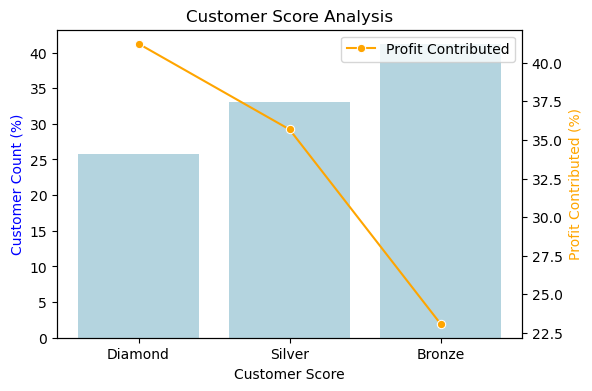

In [110]:
# Create a Seaborn figure
plt.figure(figsize=(6, 4))

# Create the bar plot for customer count
ax1 = sns.barplot(x='score', y='count_percentage', data=score_summary, color='lightblue', label='Customer Count')

# Create a twin Axes sharing the xaxis for the line plot
ax2 = ax1.twinx()

# Create the line plot for profit contributed
sns.lineplot(x='score', y='profit_percentage', data=score_summary, ax=ax2, color='orange', marker='o', label='Profit Contributed')

# Set labels and title
ax1.set_xlabel('Customer Score')
ax1.set_ylabel('Customer Count (%)', color='blue')
ax2.set_ylabel('Profit Contributed (%)', color='orange')
plt.title('Customer Score Analysis')

# Show the plot
plt.show()

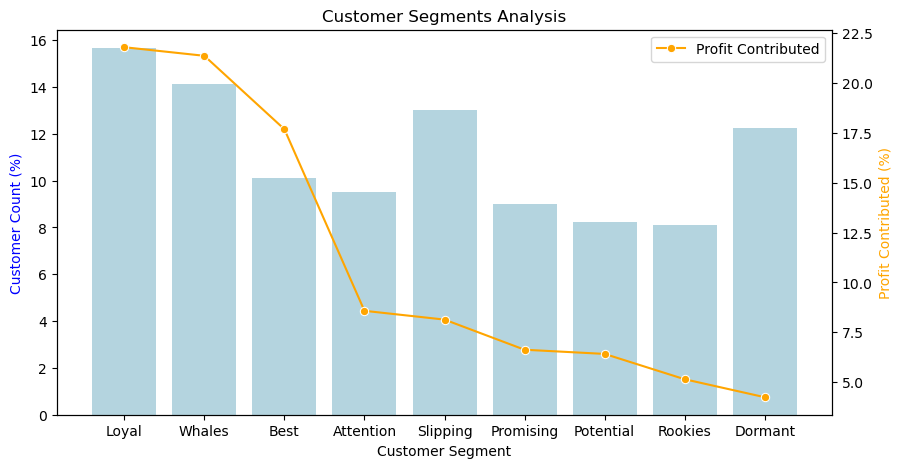

In [111]:
# Create a Seaborn figure
plt.figure(figsize=(10, 5))

# Create the bar plot for customer count
ax1 = sns.barplot(x='segment', y='count_percentage', data=segment_summary, color='lightblue', label='Customer Count')

# Create a twin Axes sharing the xaxis for the line plot
ax2 = ax1.twinx()

# Create the line plot for profit contributed
sns.lineplot(x='segment', y='profit_percentage', data=segment_summary, ax=ax2, color='orange', marker='o', label='Profit Contributed')

# Set labels and title
ax1.set_xlabel('Customer Segment')
ax1.set_ylabel('Customer Count (%)', color='blue')
ax2.set_ylabel('Profit Contributed (%)', color='orange')
plt.title('Customer Segments Analysis')

# Show the plot
plt.show()

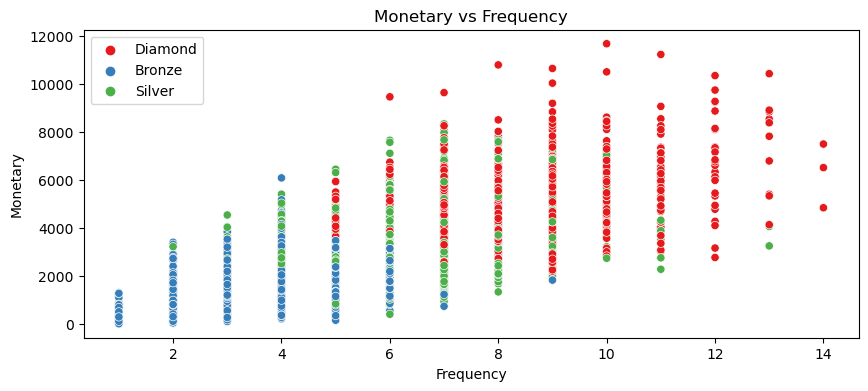

In [112]:
# Set up the figure and axes
plt.figure(figsize=(10, 4))

# Create the scatterplot
sns.scatterplot(data=rfm_table, x='frequency', y='monetary', hue='score', palette='Set1')

# Set labels and title
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Monetary vs Frequency')

# Show the legend
plt.legend()

# Show the plot
plt.show()

- **Frequent** customers contribute to higher spending.

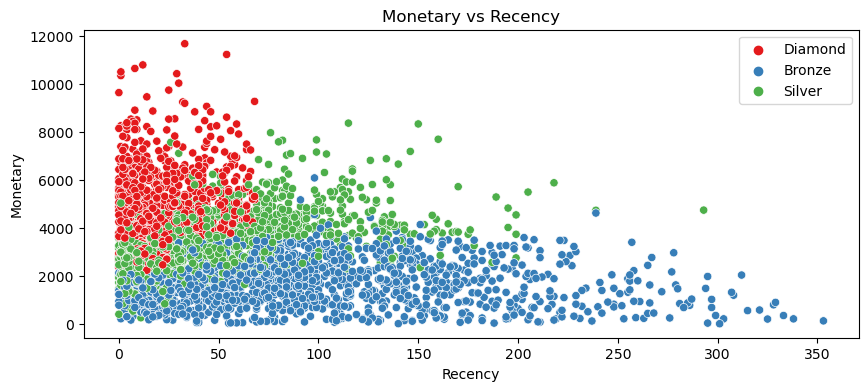

In [113]:
# Set up the figure and axes
plt.figure(figsize=(10, 4))

# Create the scatterplot
sns.scatterplot(data=rfm_table, x='recency', y='monetary', hue='score', palette='Set1')

# Set labels and title
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Monetary vs Recency')

# Show the legend
plt.legend()

# Show the plot
plt.show()

- **Recent** customers contribute to higher profit.

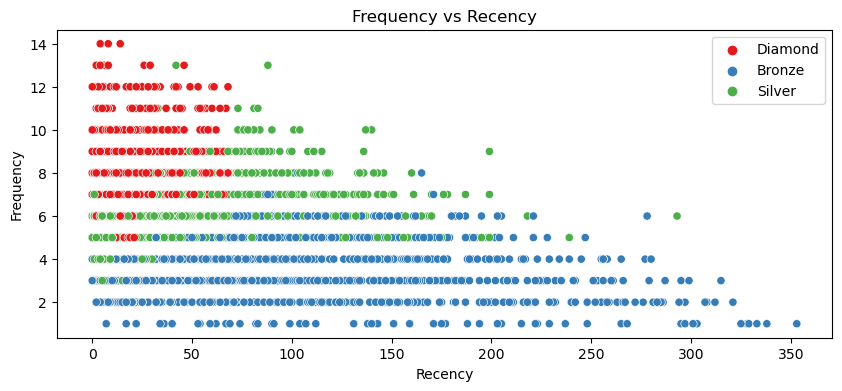

In [114]:
# Set up the figure and axes
plt.figure(figsize=(10, 4))

# Create the scatterplot
sns.scatterplot(data=rfm_table, x='recency', y='frequency', hue='score', palette='Set1')

# Set labels and title
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Frequency vs Recency')

# Show the legend
plt.legend()

# Show the plot
plt.show()

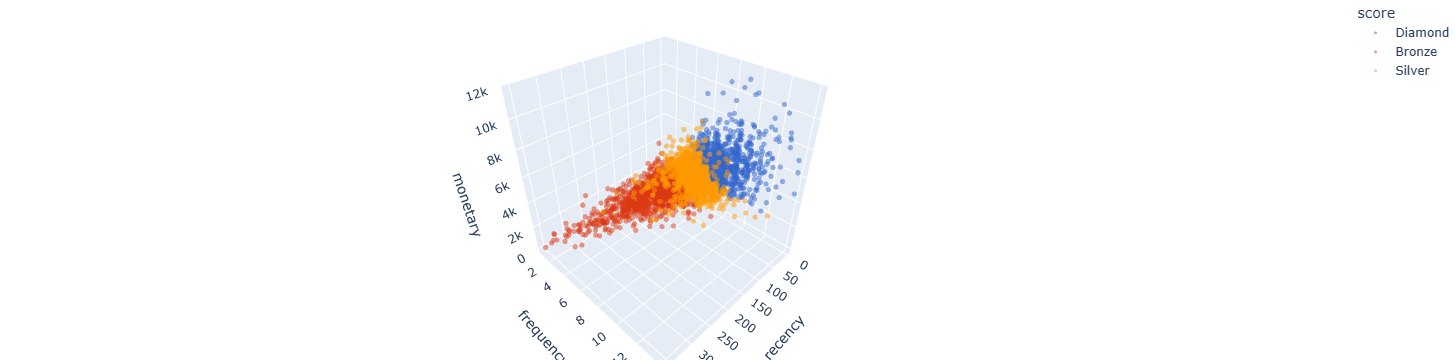

In [115]:
import plotly.express as px

fig = px.scatter_3d(rfm_table, x='recency', y='frequency', z='monetary',
                    color='score', opacity=0.5, color_discrete_sequence=px.colors.qualitative.G10)

# Reduce the size of points
fig.update_traces(marker=dict(size=3))

# Update layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# Show the plot
fig.show()


In [116]:
rfm_table.head()

customer_id  recency  frequency  monetary  recency_score  frequency_score  \
0            1        7         11   3018.09              3                3   
1            2      128          3   2226.26              1                1   
2            4      195          2    220.57              1                1   
3            5       16          6   2394.94              3                2   
4            6       64          5   3946.55              2                2   

   monetary_score rfm_segment  RFM_score    score segmentation  
0               2         332       2.67  Diamond        Loyal  
1               2         112       1.33   Bronze     Slipping  
2               1         111       1.00   Bronze      Dormant  
3               2         322       2.33   Silver    Promising  
4               3         223       2.33   Silver       Whales

In [117]:
rfm_insight1 = rfm_table.groupby(['score','segmentation'])[['customer_id']].count()
rfm_insight1.reset_index(inplace=True)
rfm_insight1.columns = ['score', 'segment','customers']
rfm_insight1['percentage'] = (rfm_insight1['customers']/rfm_insight1.shape[0]).round(2)
rfm_pivot = rfm_insight1.pivot_table(index='score', columns='segment', values='percentage', fill_value=0)
rfm_pivot

segment  Attention   Best  Dormant  Loyal  Potential  Promising  Rookies  \
score                                                                      
Bronze       19.50   0.00     30.5   0.00       7.43       0.00    12.57   
Diamond       0.00  25.14      0.0  30.93       0.00       0.00     0.00   
Silver        4.21   0.00      0.0   8.07      13.07      22.36     7.57   

segment  Slipping  Whales  
score                      
Bronze      32.43    0.00  
Diamond      0.00    8.14  
Silver       0.00   27.07

**Diamond Score Customers:**
- **Diamond customers** consist of **25.14%** of **Best customers**, **30.93%** of **Loyal customers**, and **8.14% of Whales**.
- They have a strong presence among Loyal and Best customers, indicating high levels of both recency and frequency in transactions.
- Diamond customers show a relatively balanced distribution across different segments, with a significant portion being Loyal customers.

**Silver Score Customers:**
- **Silver customers** consist of **13.07%** of **Potential customers**, **22.36%** of **Promising customers**, and **27.07% of Whales**.
- They are well-represented among Promising and Whales segments, suggesting a combination of high monetary spending and potential for future growth.
- Silver customers also have a notable presence among Potential customers, which could signify a group that has shown some interest but may need further engagement.

**Bronze Score Customers:**
- **Bronze customers** are primarily distributed among **Slipping and Rookies** segments, accounting for **32.43%** and **12.57%** respectively.
- They show a lack of representation among the Best, Loyal, and Whales segments, indicating lower recency, frequency, and monetary spending compared to other segments.
- Bronze customers also have a notable presence among Slipping, suggesting a need for re-engagement strategies to prevent further decline in engagement.

In [118]:
rfm_all_1 = rfm_table[['customer_id', 'score', 'segmentation']].copy()
rfm_all_1.head()

customer_id    score segmentation
0            1  Diamond        Loyal
1            2   Bronze     Slipping
2            4   Bronze      Dormant
3            5   Silver    Promising
4            6   Silver       Whales

In [119]:
df_all_1 = df_all[['customer_id', 'gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car', 'tenure','age_class', 'state', 'property_valuation']].copy()
df_all_1.head()

customer_id  gender            job_title job_industry_category  \
0        2950    Male  Software Engineer I    Financial Services   
1        2950    Male  Software Engineer I    Financial Services   
2        2950    Male  Software Engineer I    Financial Services   
3        3120  Female  Clinical Specialist                Health   
4        3120  Female  Clinical Specialist                Health   

  wealth_segment owns_car  tenure age_class state  property_valuation  
0  Mass Customer      Yes      10     60-69   VIC                   6  
1  Mass Customer      Yes      10     60-69   VIC                   6  
2  Mass Customer      Yes      10     60-69   VIC                   6  
3  Mass Customer      Yes      10     40-49   NSW                   5  
4  Mass Customer      Yes      10     40-49   NSW                   5

In [120]:
rfm_all = pd.merge(rfm_all_1, df_all_1, on='customer_id')
rfm_all.head()

customer_id    score segmentation  gender            job_title  \
0           1  Diamond        Loyal  Female  Executive Secretary   
1           1  Diamond        Loyal  Female  Executive Secretary   
2           1  Diamond        Loyal  Female  Executive Secretary   
3           1  Diamond        Loyal  Female  Executive Secretary   
4           1  Diamond        Loyal  Female  Executive Secretary   

  job_industry_category wealth_segment owns_car  tenure age_class state  \
0                Health  Mass Customer      Yes      11     70-79   NSW   
1                Health  Mass Customer      Yes      11     70-79   NSW   
2                Health  Mass Customer      Yes      11     70-79   NSW   
3                Health  Mass Customer      Yes      11     70-79   NSW   
4                Health  Mass Customer      Yes      11     70-79   NSW   

   property_valuation  
0                  10  
1                  10  
2                  10  
3                  10  
4                  10

In [121]:
# Select the first row for each customer_id
rfm_grouped = rfm_all.drop_duplicates(subset='customer_id').reset_index(drop=True)

# Display the result
rfm_grouped

customer_id    score segmentation  gender                    job_title  \
0              1  Diamond        Loyal  Female          Executive Secretary   
1              2   Bronze     Slipping    Male       Administrative Officer   
2              4   Bronze      Dormant    Male           Recruiting Manager   
3              5   Silver    Promising  Female                Senior Editor   
4              6   Silver       Whales    Male                Senior Editor   
...          ...      ...          ...     ...                          ...   
3481        3496   Bronze      Dormant    Male                       Editor   
3482        3497   Bronze     Slipping  Female  Administrative Assistant IV   
3483        3498   Bronze    Attention  Female  Administrative Assistant IV   
3484        3499  Diamond        Loyal    Male  Administrative Assistant IV   
3485        3500   Bronze     Slipping  Female  Administrative Assistant IV   

     job_industry_category     wealth_segment owns_car  tenure age_class  \
0                   Health      Mass Customer      Yes      11     70-79   
1       Financial Services      Mass Customer      Yes      16     40-49   
2                       IT      Mass Customer       No       7     60-69   
3                       IT  Affluent Customer      Yes       8     40-49   
4                   Retail     High Net Worth      Yes      13     50-59   
...                    ...                ...      ...     ...       ...   
3481         Manufacturing      Mass Customer      Yes      19     30-39   
3482         Manufacturing  Affluent Customer      Yes      18     30-39   
3483         Manufacturing      Mass Customer       No       5     20-29   
3484         Manufacturing      Mass Customer      Yes       7     40-49   
3485         Entertainment  Affluent Customer       No      17     50-59   

     state  property_valuation  
0      NSW                  10  
1      NSW                  10  
2      QLD                   9  
3      NSW                   4  
4      VIC                   9  
...    ...                 ...  
3481   NSW                   9  
3482   VIC                   5  
3483   VIC                   4  
3484   QLD                   9  
3485   NSW                  10  

[3486 rows x 12 columns]

In [122]:
rfm_grouped.to_csv('data.csv',index=False)

# 6. Segments Analysis

## 6.1 Diamond Customers Analysis

In [123]:
diamond_data = rfm_grouped.loc[rfm_grouped['score'] == 'Diamond'].reset_index()

In [124]:
diamond_data.describe(include='all')

index  customer_id    score segmentation  gender  \
count    899.000000        899.0      899          899     899   
unique          NaN        899.0        1            3       2   
top             NaN          1.0  Diamond        Loyal  Female   
freq            NaN          1.0      899          433     481   
mean    1716.681869          NaN      NaN          NaN     NaN   
std     1004.916478          NaN      NaN          NaN     NaN   
min        0.000000          NaN      NaN          NaN     NaN   
25%      845.500000          NaN      NaN          NaN     NaN   
50%     1737.000000          NaN      NaN          NaN     NaN   
75%     2596.500000          NaN      NaN          NaN     NaN   
max     3484.000000          NaN      NaN          NaN     NaN   

                 job_title job_industry_category wealth_segment owns_car  \
count                  899                   899            899      899   
unique                 174                     9              3        2   
top     Recruiting Manager    Financial Services  Mass Customer      Yes   
freq                    14                   217            446      450   
mean                   NaN                   NaN            NaN      NaN   
std                    NaN                   NaN            NaN      NaN   
min                    NaN                   NaN            NaN      NaN   
25%                    NaN                   NaN            NaN      NaN   
50%                    NaN                   NaN            NaN      NaN   
75%                    NaN                   NaN            NaN      NaN   
max                    NaN                   NaN            NaN      NaN   

            tenure age_class state  property_valuation  
count   899.000000       899   899          899.000000  
unique         NaN         8     3                 NaN  
top            NaN     40-49   NSW                 NaN  
freq           NaN       277   485                 NaN  
mean     10.868743       NaN   NaN            7.442714  
std       5.695944       NaN   NaN            2.855815  
min       1.000000       NaN   NaN            1.000000  
25%       6.000000       NaN   NaN            6.000000  
50%      11.000000       NaN   NaN            8.000000  
75%      16.000000       NaN   NaN           10.000000  
max      22.000000       NaN   NaN           12.000000

<h3><u>6.1.1 Segments</u></h3>

In [125]:
column_interested = 'segmentation'
diamond_result1 = calculate_percentage_count(diamond_data,column_interested)
diamond_result1

segmentation  count  percentage
0        Loyal    433       48.16
1         Best    352       39.15
2       Whales    114       12.68

<h3><u>6.1.2 Gender</u></h3>

In [126]:
column_interested = 'gender'
diamond_result1 = calculate_percentage_count(diamond_data,column_interested)
diamond_result1

gender  count  percentage
0  Female    481        53.5
1    Male    418        46.5

- The **Diamond** customers were balanced gender with female **53.5%** and male **46.5%**. 

<h3><u>6.1.3 Job Title</u></h3>

In [127]:
column_interested = 'job_title'
diamond_result1 = calculate_percentage_count(diamond_data,column_interested)
diamond_result1

job_title  count  percentage
0    Information Systems Manager     14        1.56
1             Recruiting Manager     14        1.56
2            Assistant Professor     13        1.45
3                   VP Marketing     13        1.45
4             Help Desk Operator     12        1.33
..                           ...    ...         ...
169        Research Assistant II      1        0.11
170                  Developer I      1        0.11
171    Database Administrator II      1        0.11
172            Media Manager III      1        0.11
173             Media Manager IV      1        0.11

[174 rows x 3 columns]

- **Diamond** customers have a lot of different job and no significant similar job. Highest job title are **Information Systems Manager** and **Recruiting Manager** where both comprised **1.56%** each in the customer segment.

<h3><u>6.1.4 Wealth Segment</u></h3>

In [128]:
column_interested = 'wealth_segment'
diamond_result1 = calculate_percentage_count(diamond_data,column_interested)
diamond_result1

wealth_segment  count  percentage
0      Mass Customer    446       49.61
1     High Net Worth    237       26.36
2  Affluent Customer    216       24.03

- Almost **half (49.61%)** of the **Diamond** customers are identified as **Mass Customer** wealth segment.

<h3><u>6.1.5 Job Industry Category</u></h3>

In [129]:
column_interested = 'job_industry_category'
diamond_result1 = calculate_percentage_count(diamond_data,column_interested)
diamond_result1

job_industry_category  count  percentage
0    Financial Services    217       24.14
1         Manufacturing    204       22.69
2                Health    166       18.46
3                Retail    104       11.57
4              Property     67        7.45
5                    IT     64        7.12
6         Entertainment     36        4.00
7           Argiculture     25        2.78
8    Telecommunications     16        1.78

- Most of the customers are working in **Financial Services, Manufacturing, Health** and **Retail** industries category.

<h3><u>6.1.6 Car Ownership</u></h3>

In [130]:
column_interested = 'owns_car'
diamond_result1 = calculate_percentage_count(diamond_data,column_interested)
diamond_result1

owns_car  count  percentage
0      Yes    450       50.06
1       No    449       49.94

- Car ownership for **Diamond** customers are divided evenly. No significant pattern.

<h3><u>6.1.7 Age Class</u></h3>

In [131]:
column_interested = 'age_class'
diamond_result1 = calculate_percentage_count(diamond_data,column_interested)
diamond_result1

age_class  count  percentage
0     40-49    277       30.81
1     50-59    179       19.91
2     30-39    153       17.02
3     60-69    150       16.69
4     20-29    122       13.57
5     70-79     16        1.78
6     80-89      1        0.11
7     90-99      1        0.11

- Most customers are having age range of **40-49**.

<h3><u>6.1.8 States of Residency</u></h3>

In [132]:
column_interested = 'state'
diamond_result1 = calculate_percentage_count(diamond_data,column_interested)
diamond_result1

state  count  percentage
0   NSW    485       53.95
1   VIC    235       26.14
2   QLD    179       19.91

- Most customers are living in **NSW**.

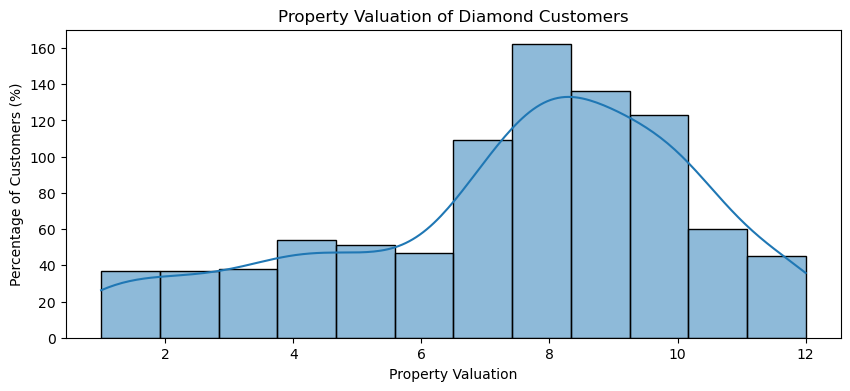

In [133]:
grouped_data = diamond_data.groupby(['property_valuation'])[['customer_id']].count().reset_index()
total = diamond_data.shape[0]
diamond_data['percentage'] = round((grouped_data['customer_id'] / total) * 100, 2)

plt.figure(figsize=(10, 4))
sns.histplot(data=diamond_data, x='property_valuation', bins=12, kde=True)
plt.title('Property Valuation of Diamond Customers')
plt.xlabel('Property Valuation')
plt.ylabel('Percentage of Customers (%)')
plt.show()

- The prevalent age range among customers in the **Diamond** segment is **7-10**.

In [134]:
diamond_data.to_csv('data/diamond_customer.csv',index=False)

## 6.2 Diamond Customers Summary

- The **Diamond** customer segment demonstrates a gender balance, with females comprising **53.5%** and males comprising **46.5%** of the segment.
- **Diamond** customers exhibit diverse job titles, with no prominent recurring job category. The top job titles, such as **Information Systems Manager** and **Recruiting Manager**, each account for **1.56%** of the customer segment.
- Approximately **49.61%** of the **Diamond** customers fall under the **Mass Customer** wealth segment category.
- The majority of **Diamond** customers are employed in industries such as **Financial Services, Manufacturing** and **Health** collectively making up **65.29%** of the segment.
- Car ownership among **Diamond** customers is evenly distributed, showing no significant discernible pattern.
- The prevalent age range among customers in the **Diamond** segment is **40-49**, constituting **30.81%** of the total.
- A substantial **53.95%** of **Diamond** customers are located in the **NSW** region.
- The prevalent age range among customers in the **Diamond** segment is **7-10**.

# 7. Reference

- https://www.optimove.com/resources/learning-center/rfm-segmentation
- https://www.barilliance.com/rfm-analysis/